<a href="https://colab.research.google.com/github/Josh1313/ML_Telecom_churn/blob/main/ML_1__PREPRO_Martinez%2CMolina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SUP ML 1 - PREPROCESSING

 # Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importar train-test data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/EJERCICIO-ML-Sup-main/data/telecom_churn_TRAINTEST.csv")

# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               89866 non-null  float64
 1   mou               89866 non-null  float64
 2   totmrc            89866 non-null  float64
 3   da                89866 non-null  float64
 4   ovrmou            89866 non-null  float64
 5   ovrrev            89866 non-null  float64
 6   vceovr            89866 non-null  float64
 7   datovr            89866 non-null  float64
 8   roam              89866 non-null  float64
 9   change_mou        89405 non-null  float64
 10  change_rev        89405 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null  float

In [ ]:
df.head()

rev     mou  totmrc      da  ovrmou  ovrrev  vceovr  datovr  roam  \
0  23.9975  219.25  22.500  0.2475    0.00     0.0     0.0     0.0   0.0   
1  57.4925  482.75  37.425  0.2475   22.75     9.1     9.1     0.0   0.0   
2  16.9900   10.25  16.990  0.0000    0.00     0.0     0.0     0.0   0.0   
3  38.0000    7.50  38.000  0.0000    0.00     0.0     0.0     0.0   0.0   
4  55.2300  570.50  71.980  0.0000    0.00     0.0     0.0     0.0   0.0   

   change_mou  change_rev  drop_vce  drop_dat  blck_vce  blck_dat   unan_vce  \
0     -157.25    -18.9975  0.666667       0.0  0.666667       0.0   6.333333   
1      532.25     50.9875  8.333333       0.0  1.000000       0.0  61.333333   
2       -4.25      0.0000  0.333333       0.0  0.000000       0.0   2.666667   
3       -1.50      0.0000  0.000000       0.0  0.000000       0.0   0.000000   
4       38.50      0.0000  9.666667       0.0  0.666667       0.0  77.000000   

   unan_dat    plcd_vce  plcd_dat   recv_vce  recv_sms    comp_vce  comp_dat  \
0       0.0   52.333333       0.0  42.333333       0.0   45.000000       0.0   
1       0.0  263.333333       0.0  69.000000       0.0  193.333333       0.0   
2       0.0    9.000000       0.0   0.333333       0.0    6.000000       0.0   
3       0.0    3.666667       0.0   1.333333       0.0    3.666667       0.0   
4       0.0  222.333333       0.0  94.666667       0.0  137.000000       0.0   

   custcare   ccrndmou     cc_mou   inonemin  threeway    mou_cvce  mou_cdat  \
0  0.000000   0.000000   0.000000  18.000000  0.000000   90.643333       0.0   
1  1.666667   6.333333   5.463333  53.000000  0.333333  189.396667       0.0   
2  0.000000   0.000000   0.000000   0.333333  0.000000    5.426667       0.0   
3  0.000000   0.000000   0.000000   1.333333  0.000000    8.410000       0.0   
4  8.666667  15.000000  11.076667  66.000000  0.000000  285.233333       0.0   

     mou_rvce  owylis_vce  mouowylisv  iwylis_vce  mouiwylisv   peak_vce  \
0   97.176667    0.000000    0.000000    0.000000    0.000000  58.000000   
1   55.280000   46.333333   24.216667    6.333333    3.696667  83.666667   
2    0.000000    0.000000    0.000000    0.000000    0.000000   5.000000   
3    0.413333    0.333333    0.256667    0.000000    0.000000   1.333333   
4  106.330000   14.666667   10.816667    0.666667    0.366667  97.333333   

   peak_dat    mou_peav  mou_pead     opk_vce  opk_dat    mou_opkv  mou_opkd  \
0       0.0  132.600000       0.0   24.000000      0.0   55.220000       0.0   
1       0.0   75.333333       0.0  157.000000      0.0  169.343333       0.0   
2       0.0    5.193333       0.0    1.000000      0.0    0.233333       0.0   
3       0.0    3.380000       0.0    3.666667      0.0    5.450000       0.0   
4       0.0  173.476667       0.0   90.333333      0.0  218.086667       0.0   

    drop_blk     attempt    complete  callfwdv  callwait  churn  months  \
0   1.333333   52.333333   45.000000       0.0  0.333333      1      61   
1   9.333333  263.333333  193.333333       0.0  5.666667      0      56   
2   0.333333    9.000000    6.000000       0.0  0.000000      1      58   
3   0.000000    3.666667    3.666667       0.0  0.000000      0      60   
4  10.333333  222.333333  137.000000       0.0  0.000000      0      57   

   uniqsubs  actvsubs new_cell crclscod asl_flag  totcalls       totmou  \
0         2         1        U        A        N      1652   4228.00000   
1         1         1        N       EA        N     14654  26400.00000   
2         1         1        Y        C        N      7903  24385.05333   
3         1         1        Y        B        N      1502   3065.00000   
4         1         1        Y        A        N      4485  14028.00000   

    totrev   adjrev    adjmou  adjqty  avgrev  avgmou  avgqty  avg3mou  \
0  1504.62  1453.44   4085.00    1602   29.66   83.37   32.69      272   
1  2851.68  2833.88  26367.00   14624   51.53  479.40  265.89      305   
2  2155.91  1934.47  24303.05    7888   34.54

In [ ]:
target = 'churn'

In [ ]:

def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i")  and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O")  and i not in target:
              lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas

In [ ]:

lista_numericas, lista_boolean, lista_categoricas= obtener_lista_variables(df)

In [ ]:
lista_categoricas

['new_cell',
 'crclscod',
 'asl_flag',
 'prizm_social_one',
 'area',
 'dualband',
 'refurb_new',
 'hnd_webcap',
 'ownrent',
 'dwlltype',
 'marital',
 'infobase',
 'HHstatin',
 'dwllsize',
 'ethnic',
 'kid0_2',
 'kid3_5',
 'kid6_10',
 'kid11_15',
 'kid16_17',
 'creditcd']

In [ ]:
lista_numericas

['rev',
 'mou',
 'totmrc',
 'da',
 'ovrmou',
 'ovrrev',
 'vceovr',
 'datovr',
 'roam',
 'change_mou',
 'change_rev',
 'drop_vce',
 'drop_dat',
 'blck_vce',
 'blck_dat',
 'unan_vce',
 'unan_dat',
 'plcd_vce',
 'plcd_dat',
 'recv_vce',
 'recv_sms',
 'comp_vce',
 'comp_dat',
 'custcare',
 'ccrndmou',
 'cc_mou',
 'inonemin',
 'threeway',
 'mou_cvce',
 'mou_cdat',
 'mou_rvce',
 'owylis_vce',
 'mouowylisv',
 'iwylis_vce',
 'mouiwylisv',
 'peak_vce',
 'peak_dat',
 'mou_peav',
 'mou_pead',
 'opk_vce',
 'opk_dat',
 'mou_opkv',
 'mou_opkd',
 'drop_blk',
 'attempt',
 'complete',
 'callfwdv',
 'callwait',
 'months',
 'uniqsubs',
 'actvsubs',
 'totcalls',
 'totmou',
 'totrev',
 'adjrev',
 'adjmou',
 'adjqty',
 'avgrev',
 'avgmou',
 'avgqty',
 'avg3mou',
 'avg3qty',
 'avg3rev',
 'avg6mou',
 'avg6qty',
 'avg6rev',
 'hnd_price',
 'phones',
 'models',
 'truck',
 'rv',
 'lor',
 'adults',
 'income',
 'numbcars',
 'forgntvl',
 'eqpdays',
 'Customer_ID']

#  Distribucion de cada variable

In [ ]:
target = 'churn'
features = lista_numericas
feature_sets = [features[i:i+5] for i in range(0, len(features), 10)]
X = df[features]
y = df[target]

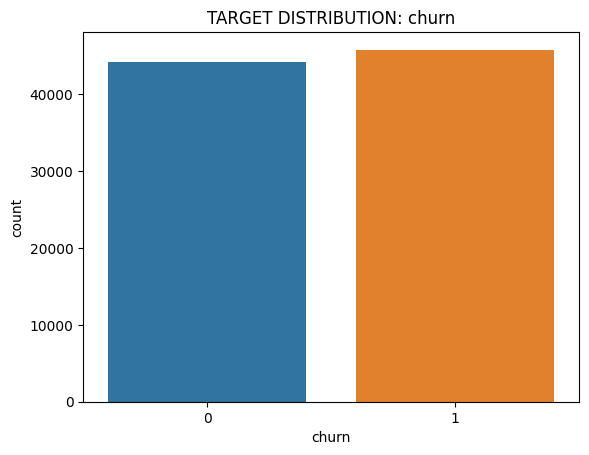

In [ ]:
sns.countplot(x=y)
plt.title('TARGET DISTRIBUTION: '+target)
plt.show()

In [ ]:
feature_sets = [features[i:i+1] for i in range(0, len(features), 5)]

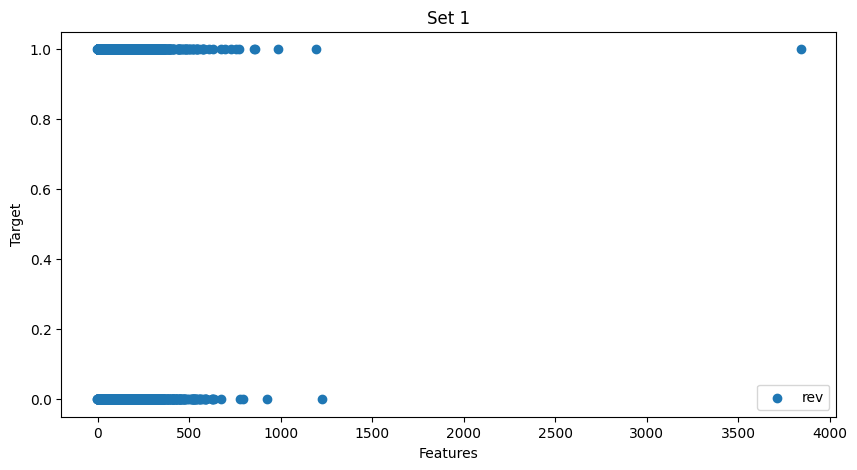

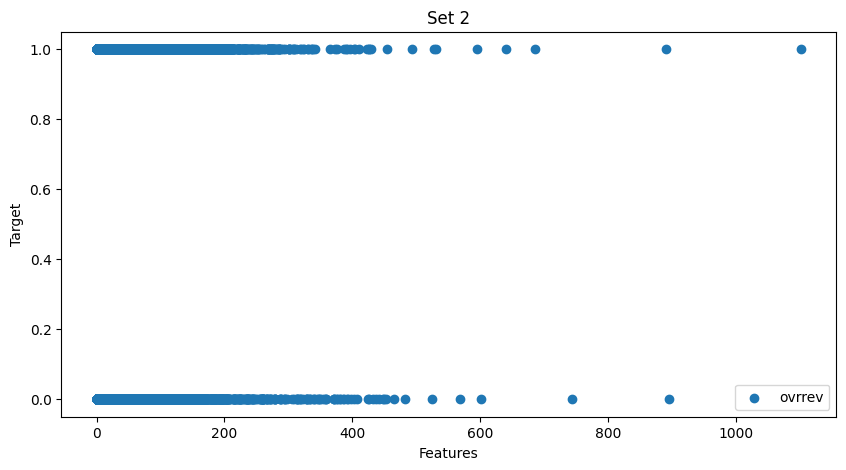

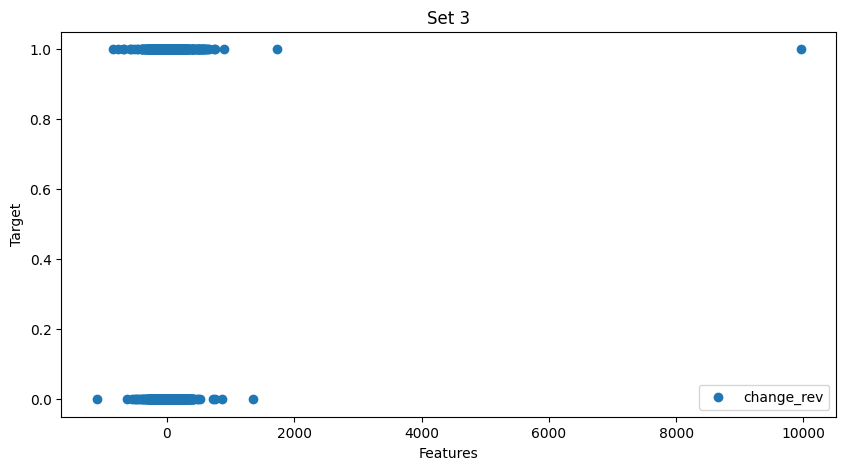

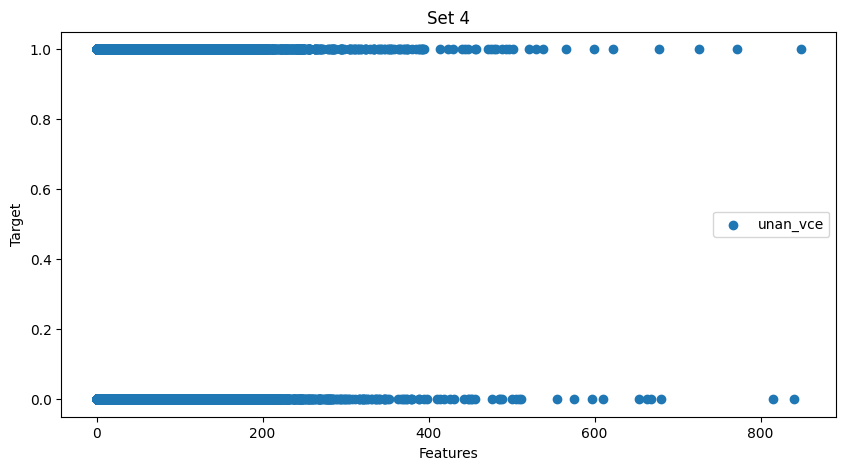

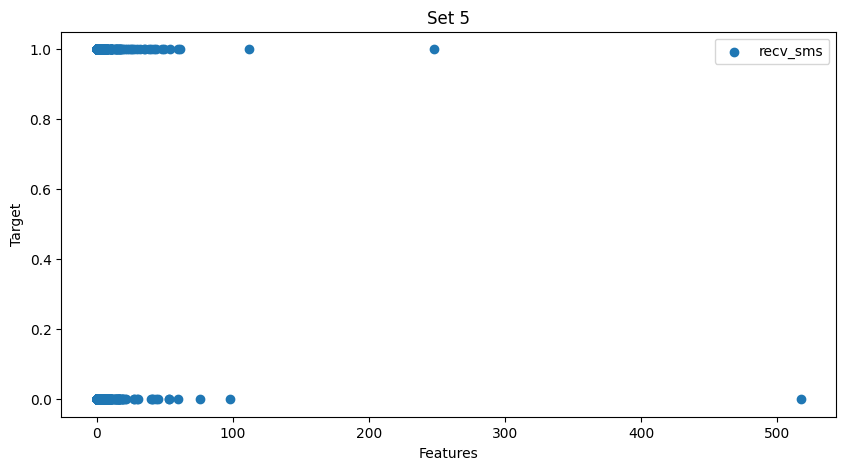

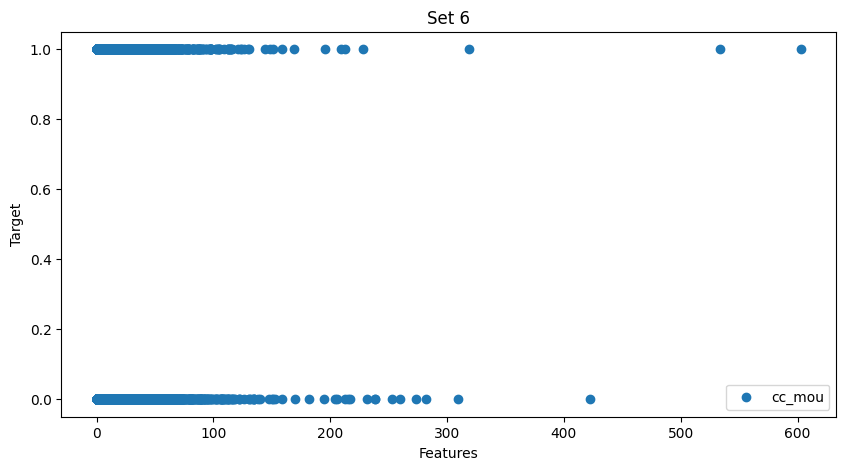

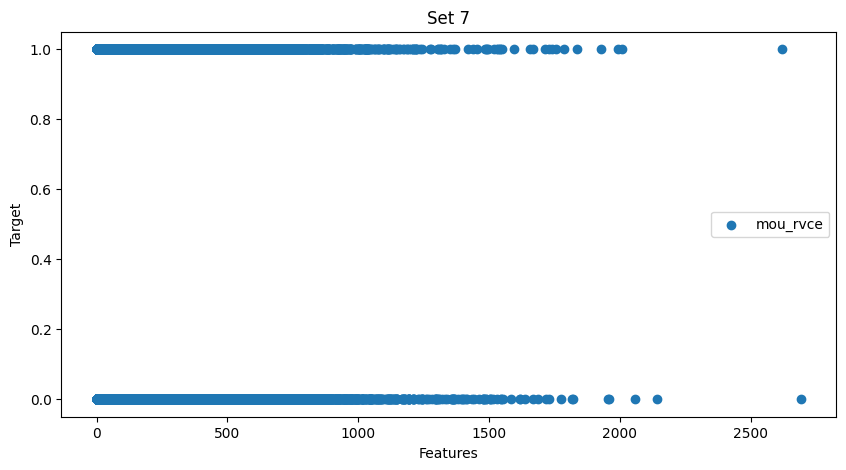

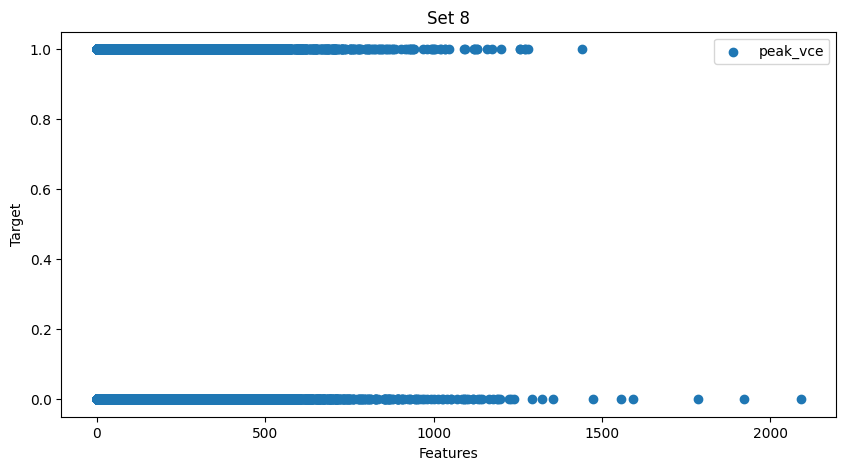

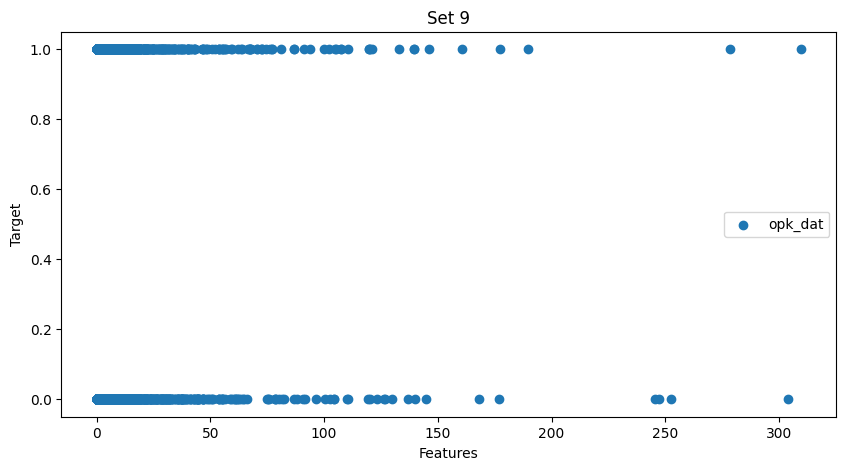

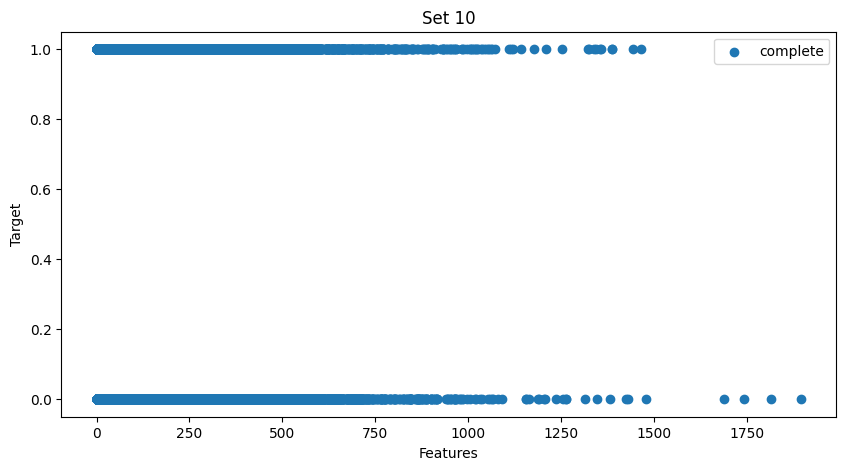

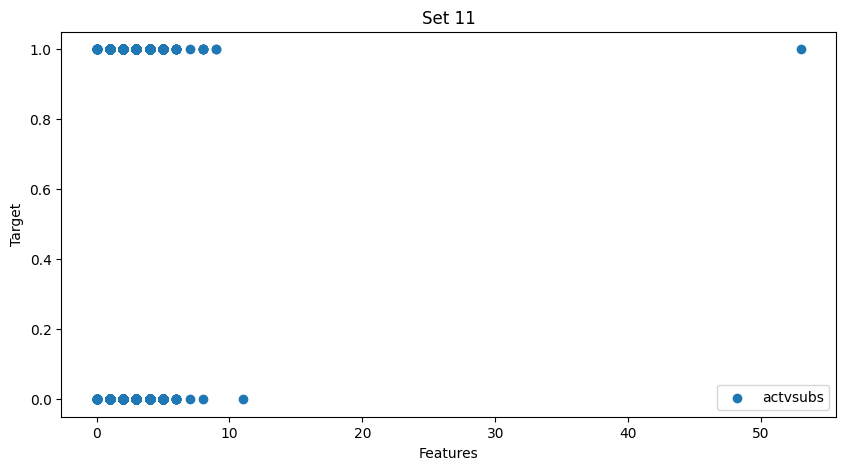

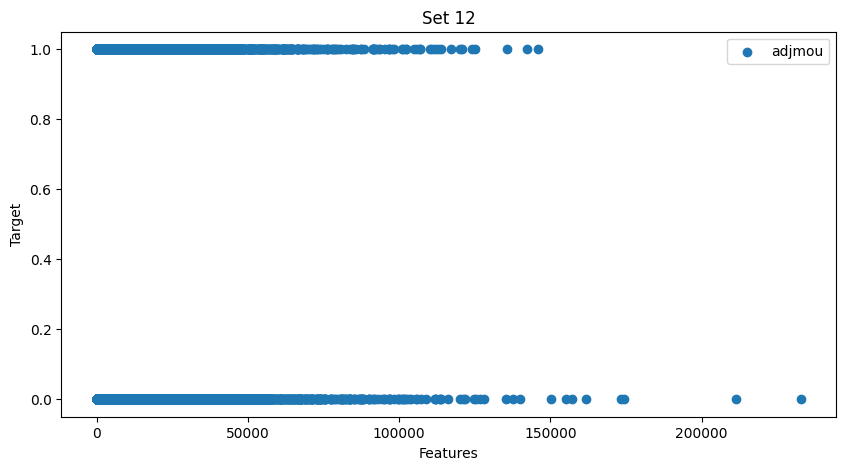

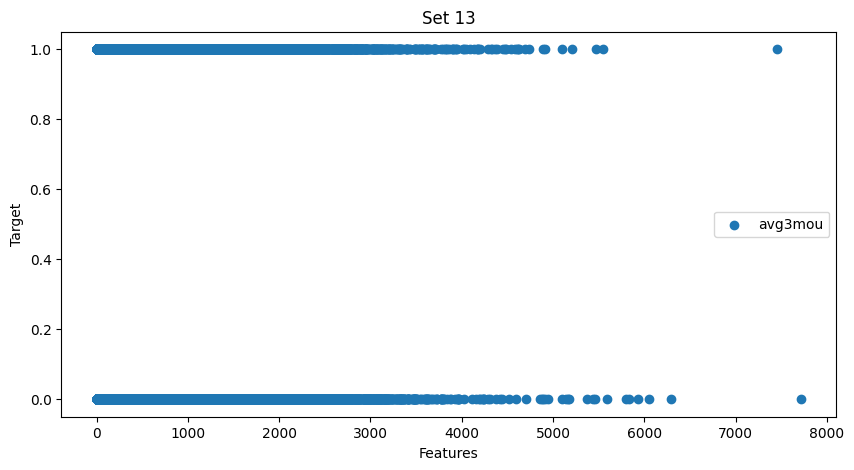

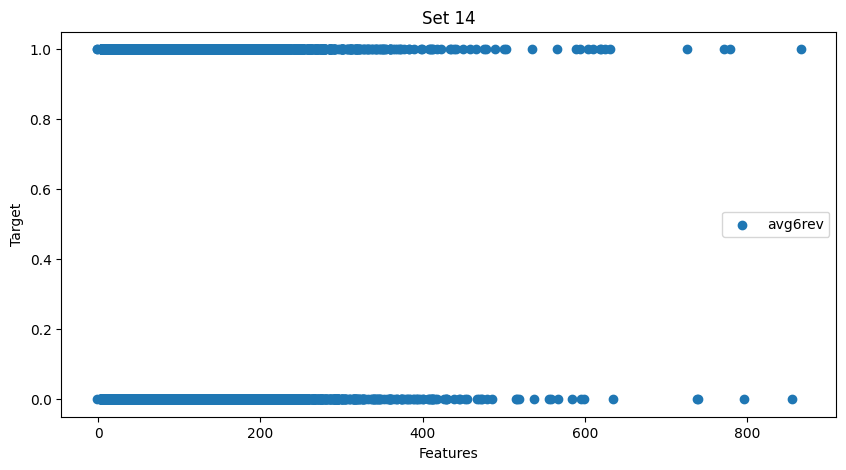

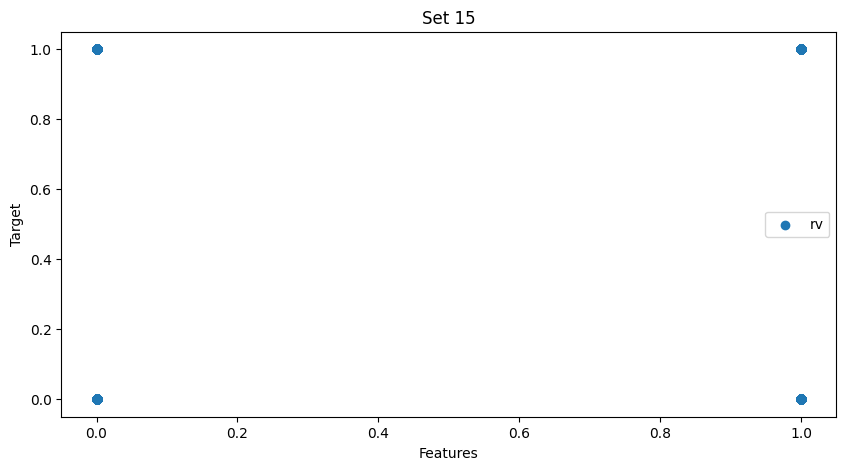

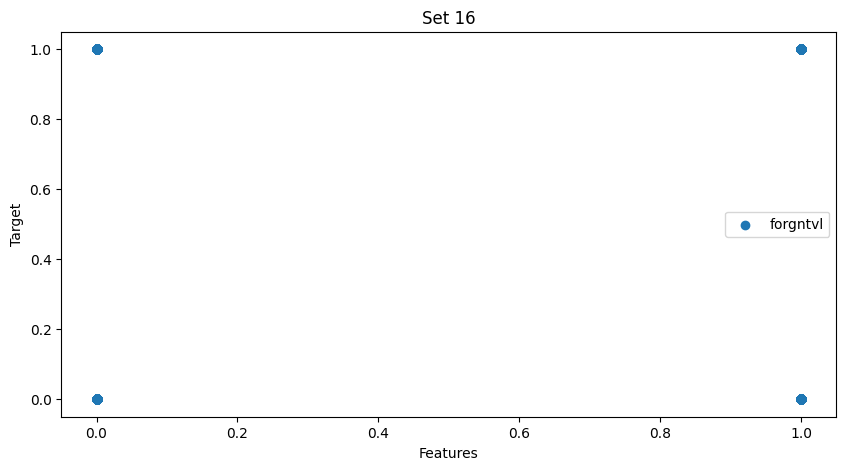

In [ ]:

for i, feature_set in enumerate(feature_sets):
    plt.figure(figsize=(10, 5))
    for feature in feature_set:
        plt.scatter(df[feature], df[target], label=feature)
    plt.xlabel('Features')
    plt.ylabel('Target')
    plt.title('Set {}'.format(i+1))
    plt.legend()
    plt.show()

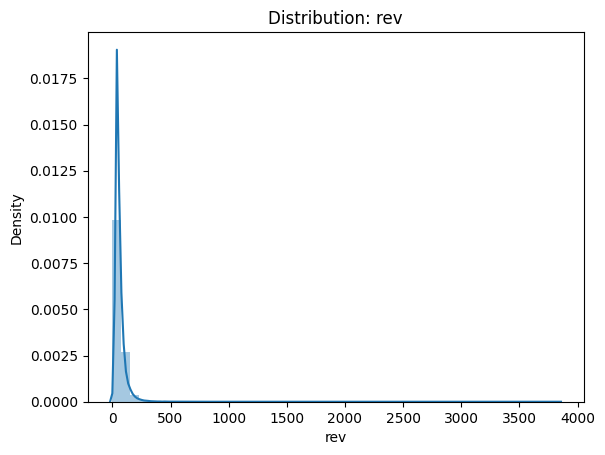

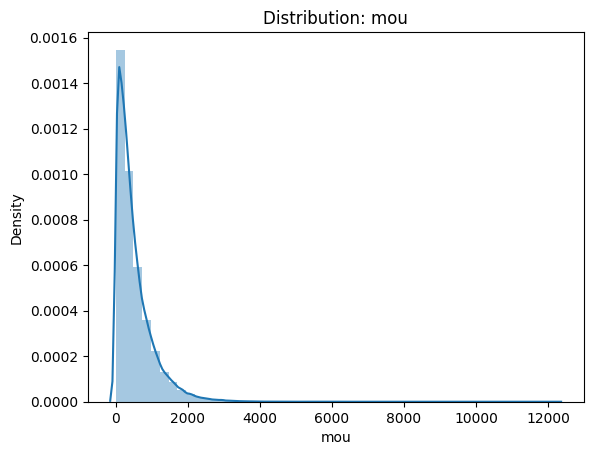

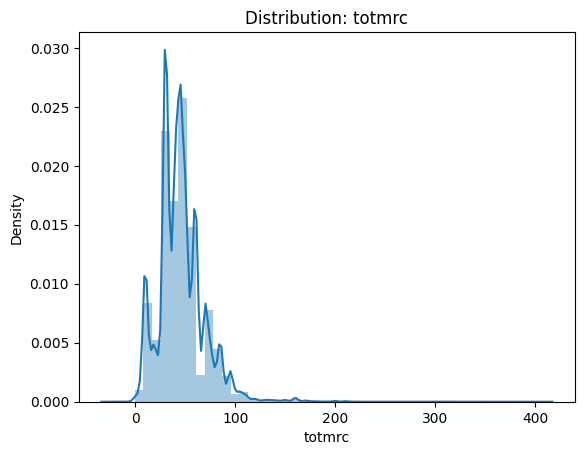

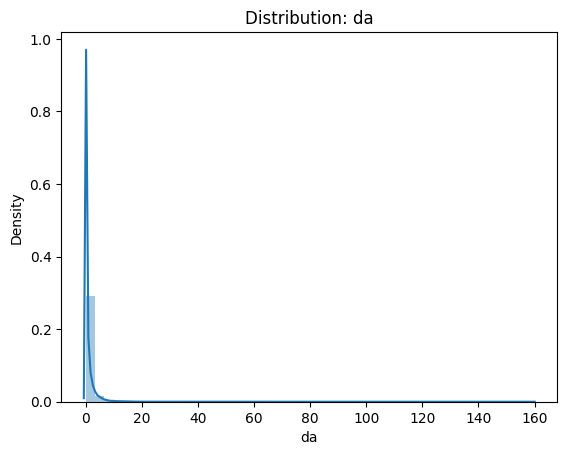

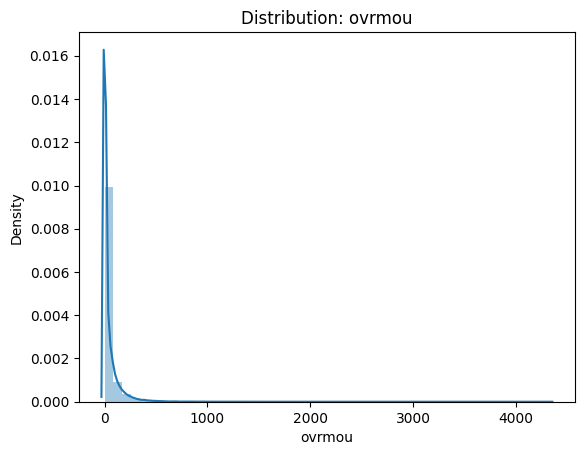

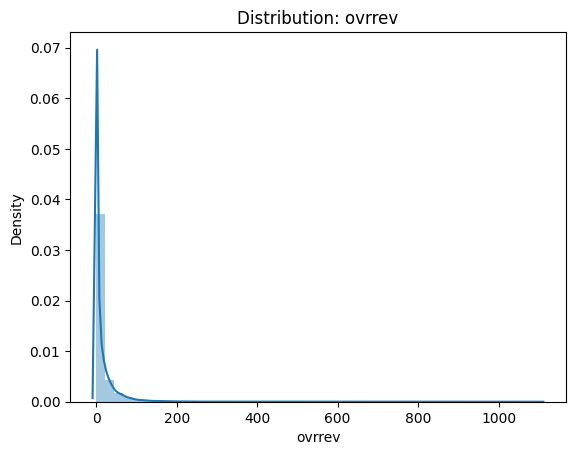

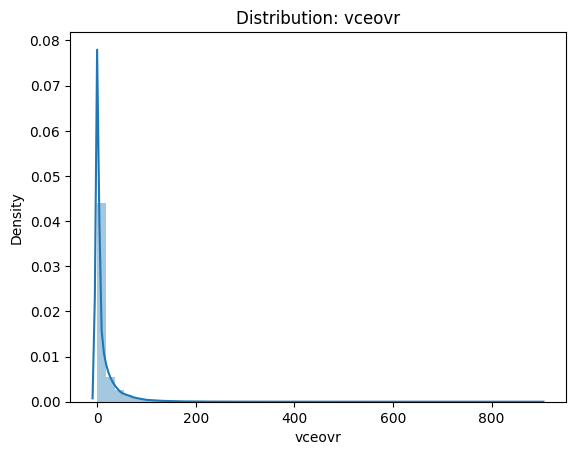

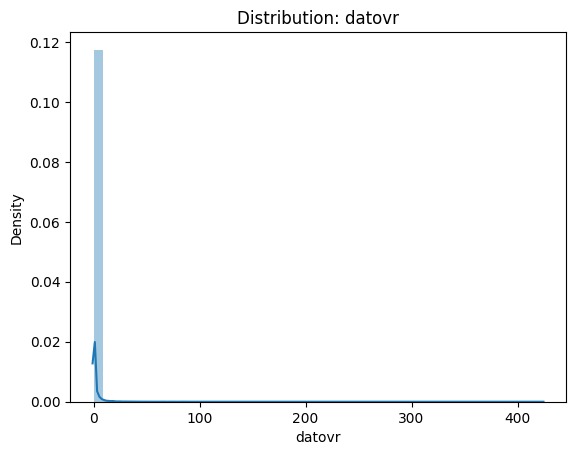

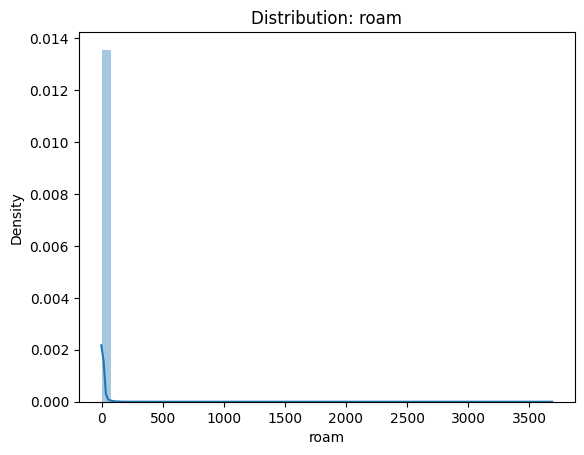

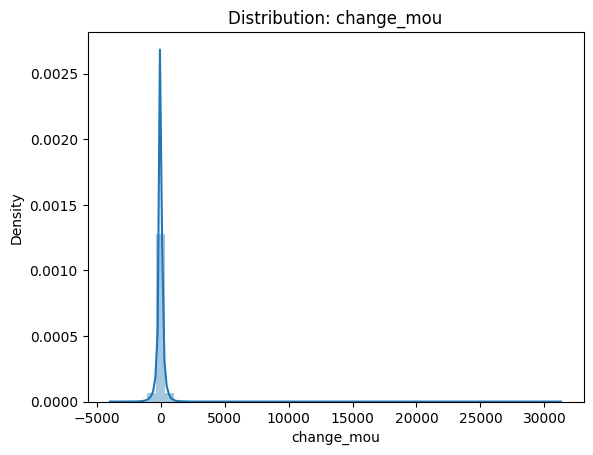

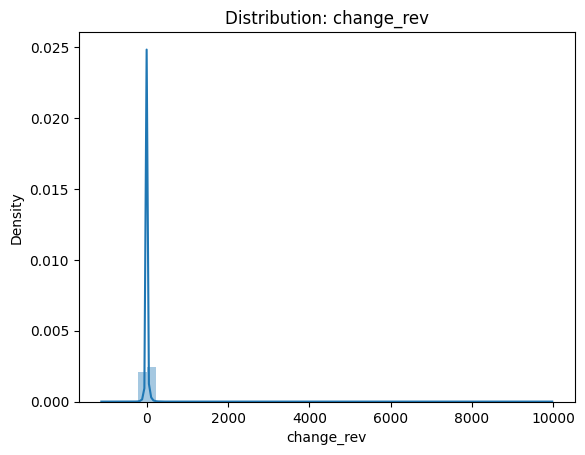

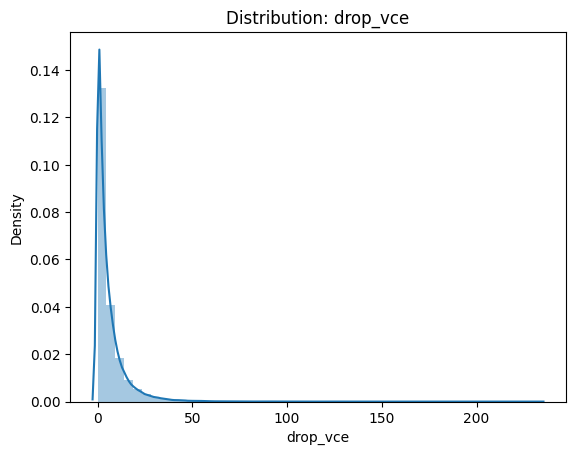

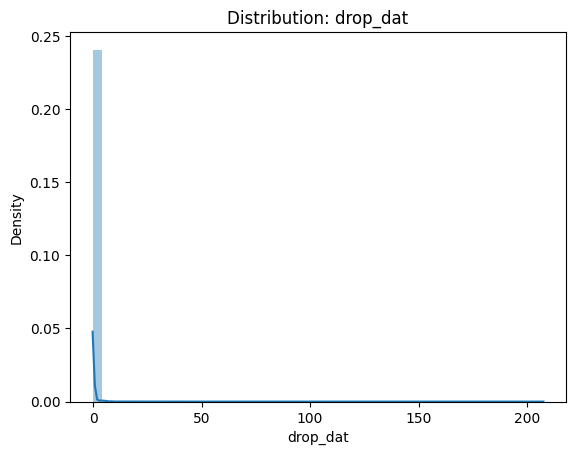

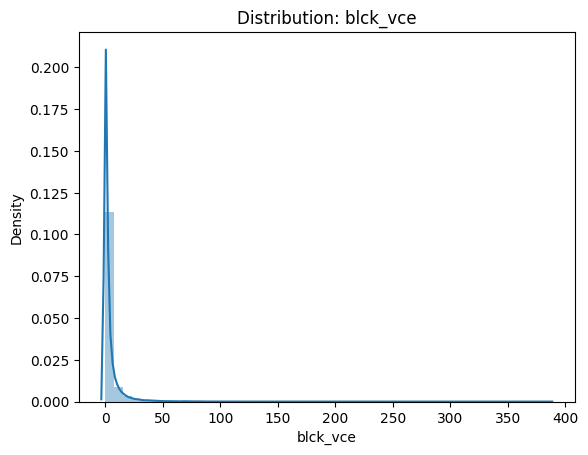

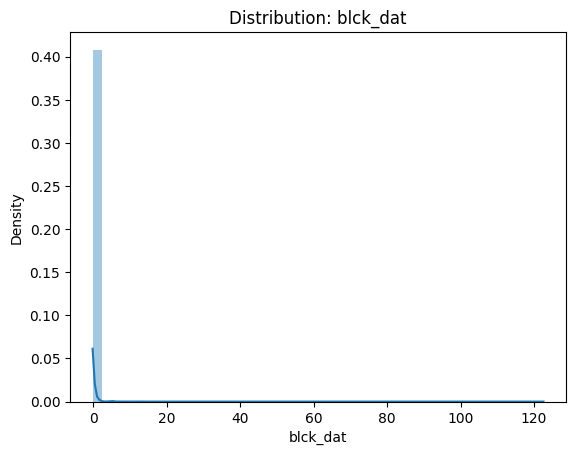

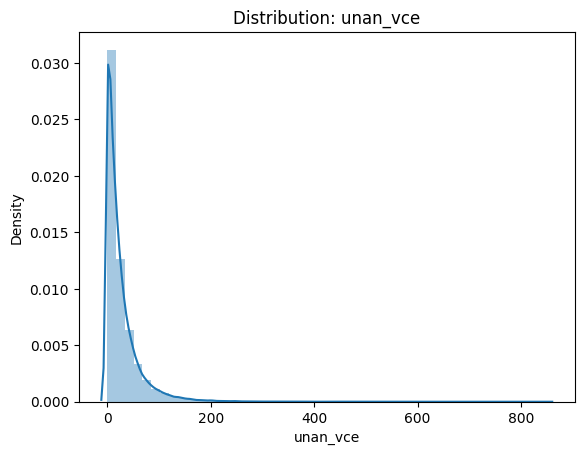

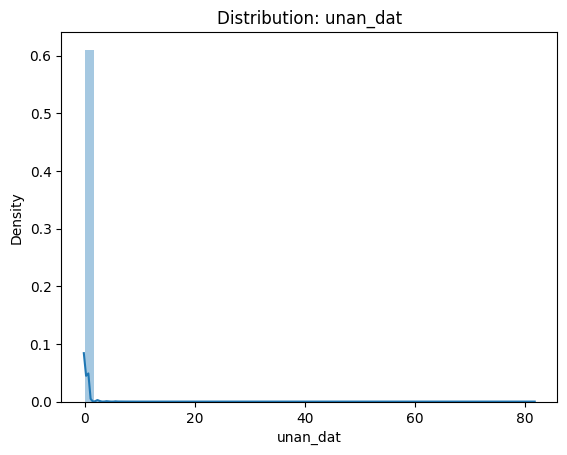

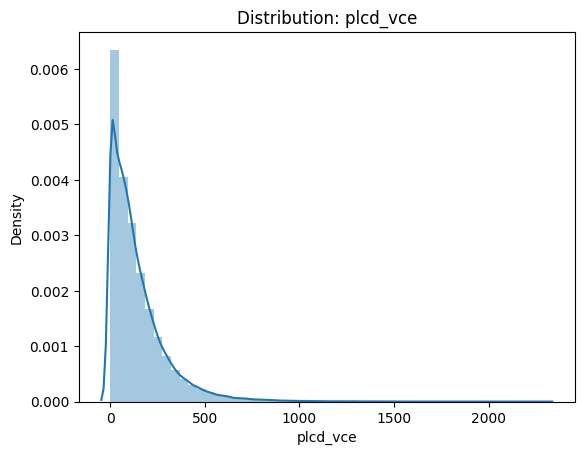

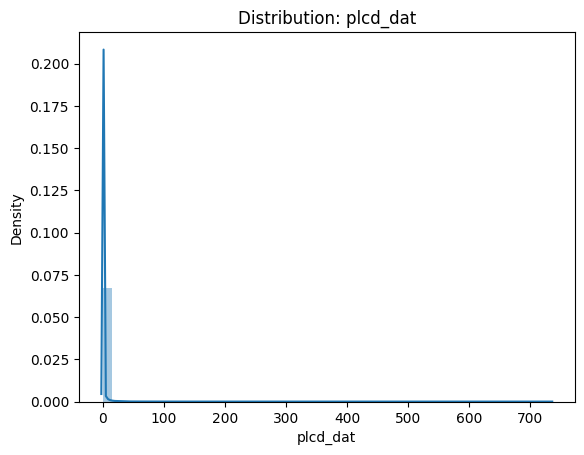

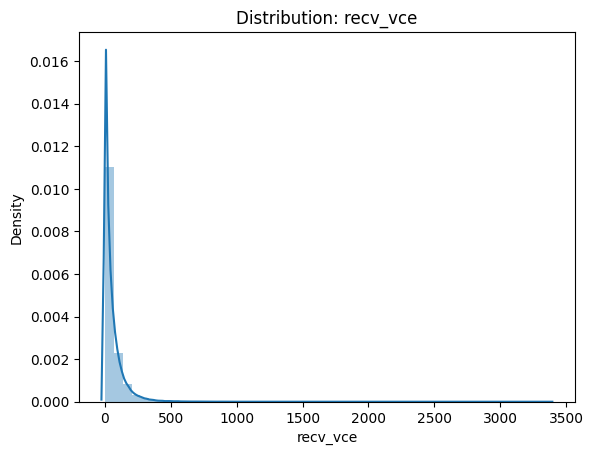

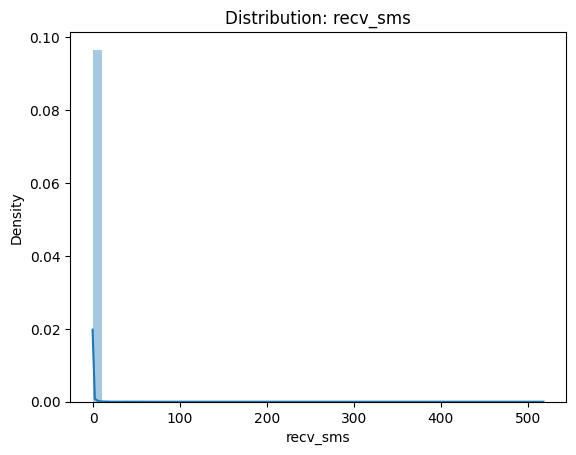

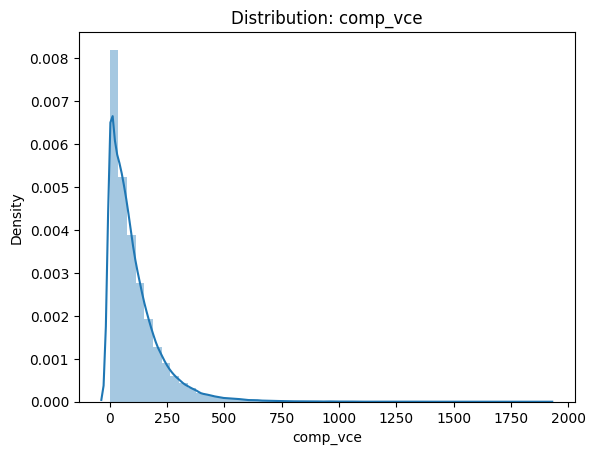

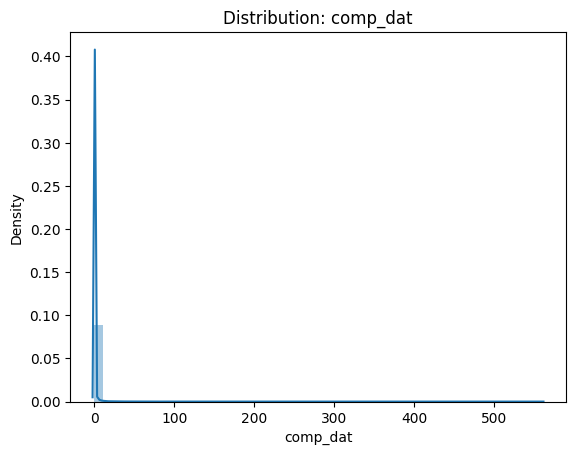

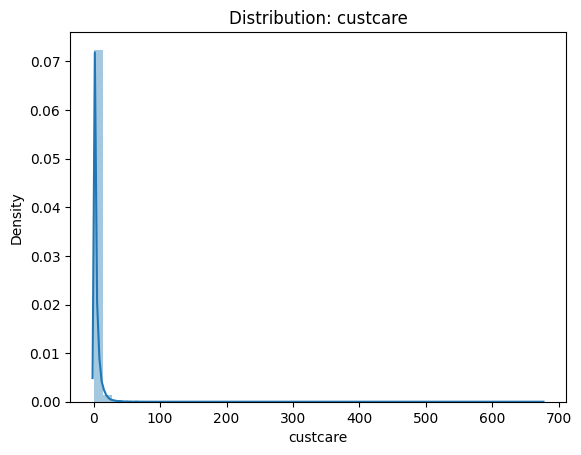

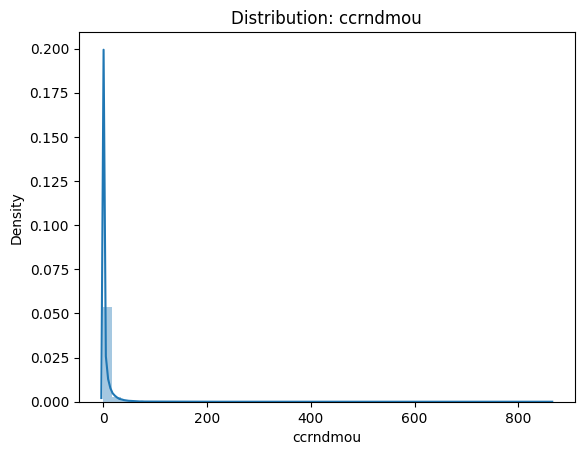

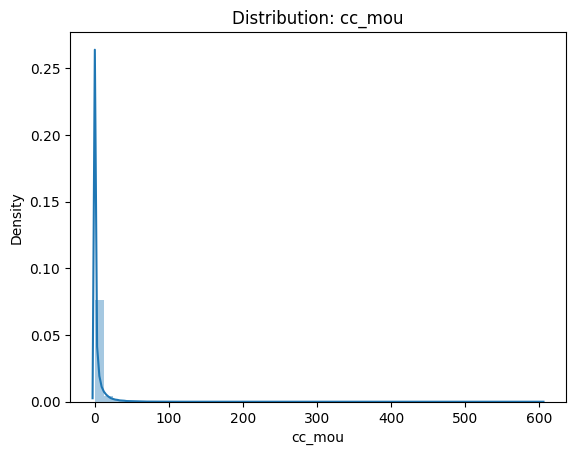

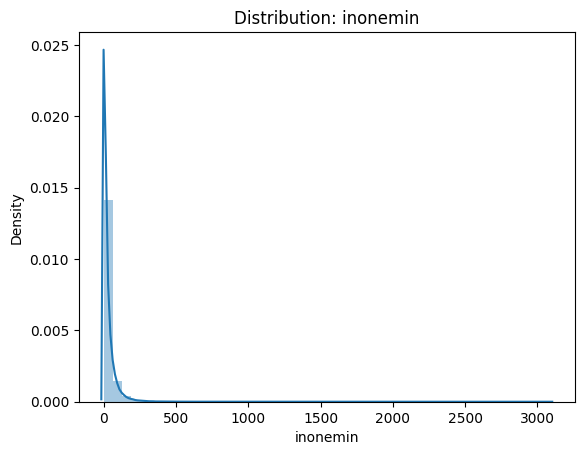

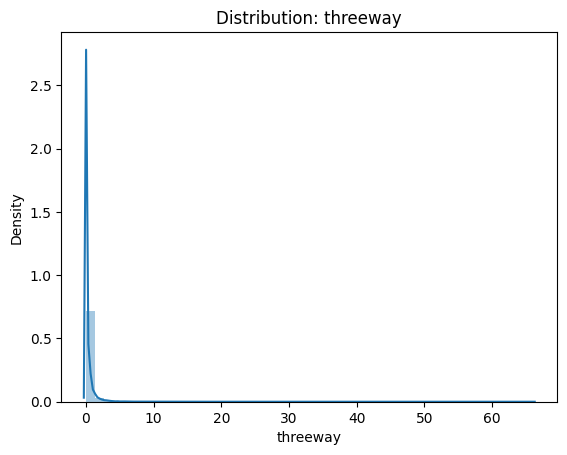

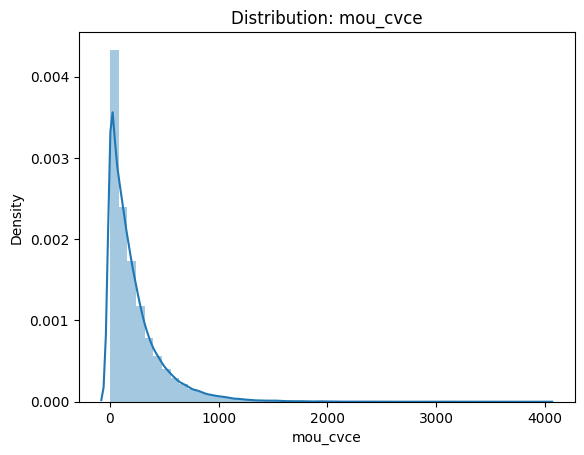

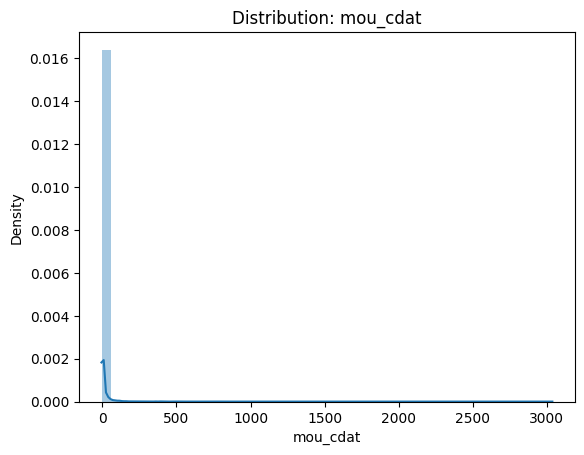

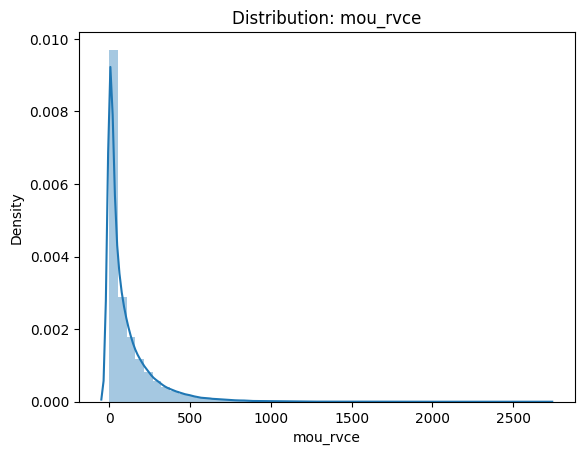

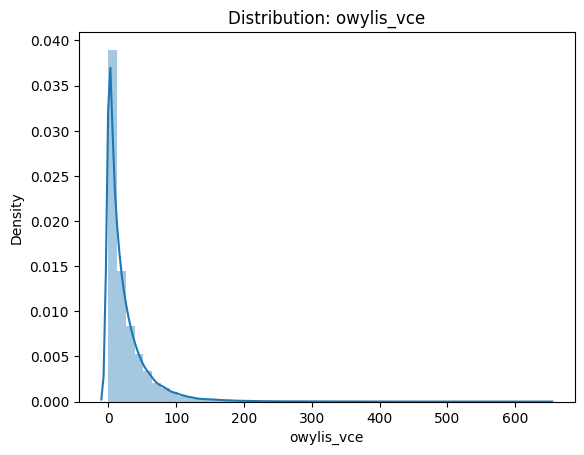

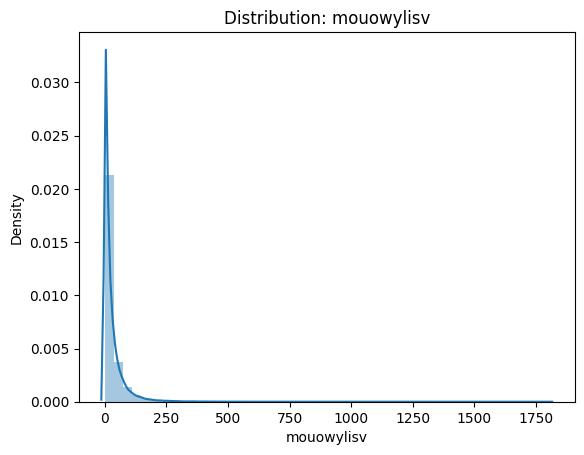

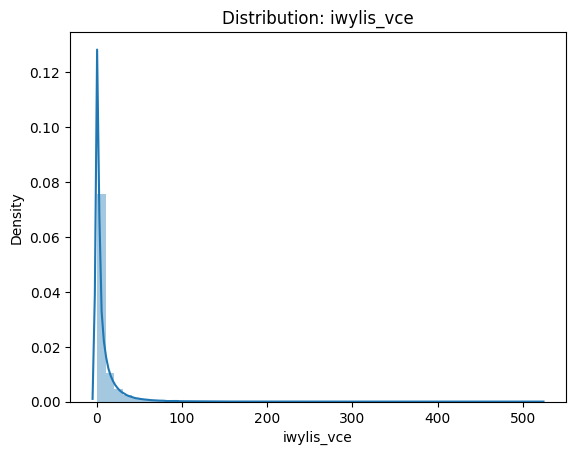

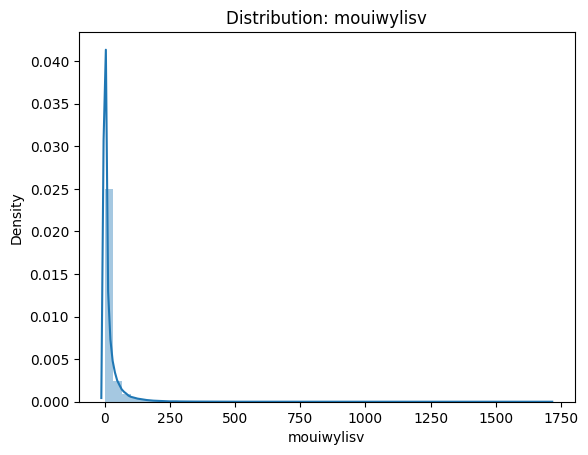

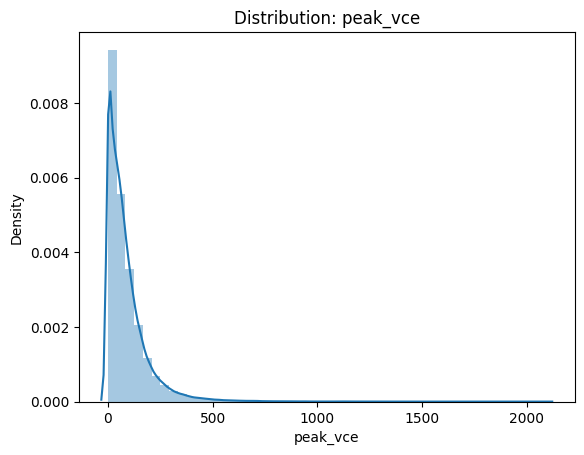

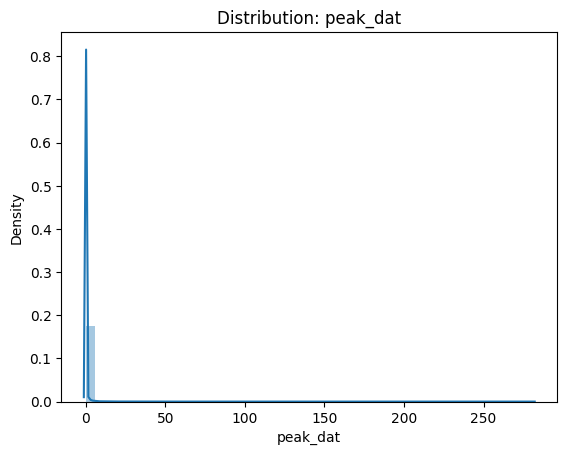

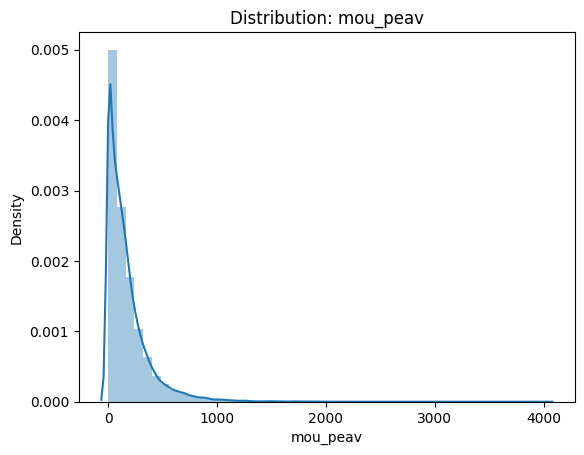

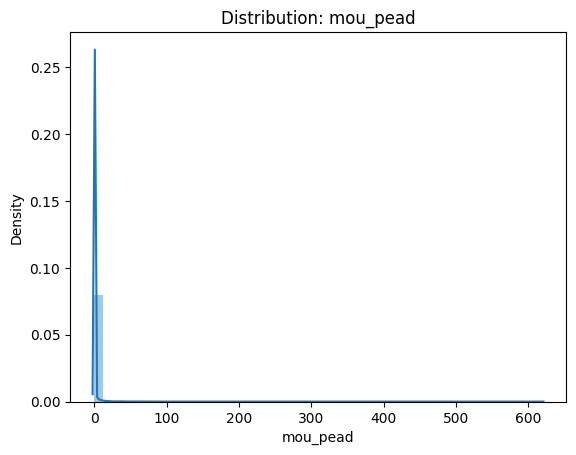

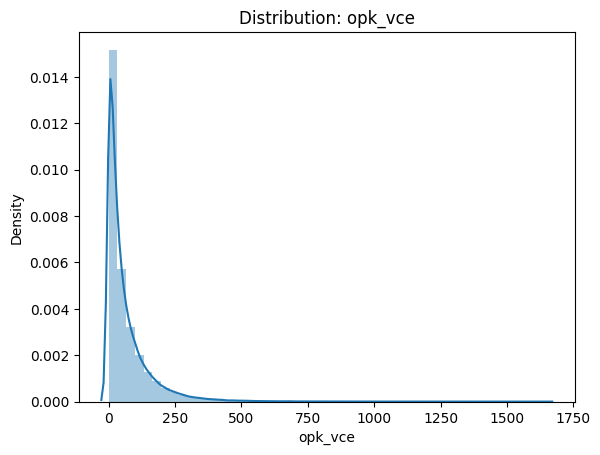

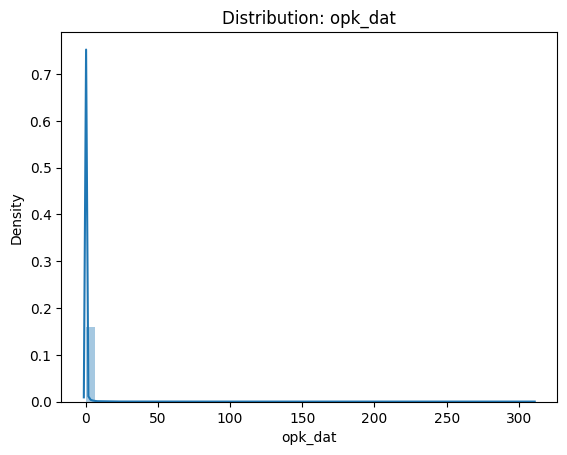

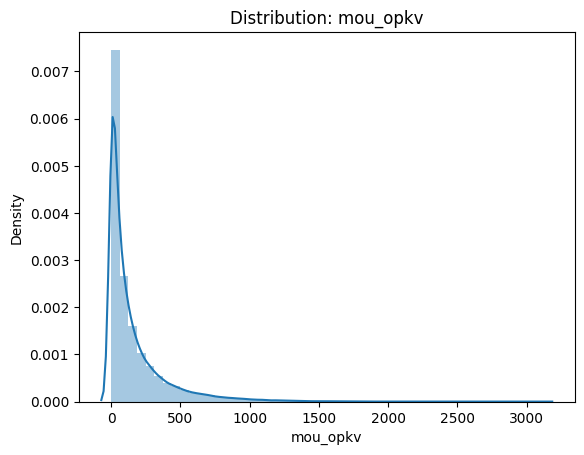

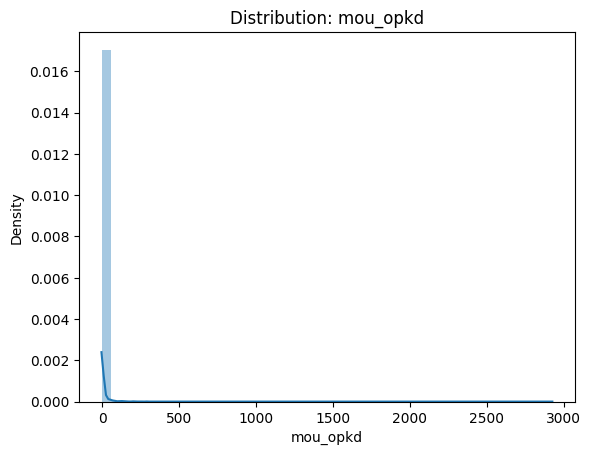

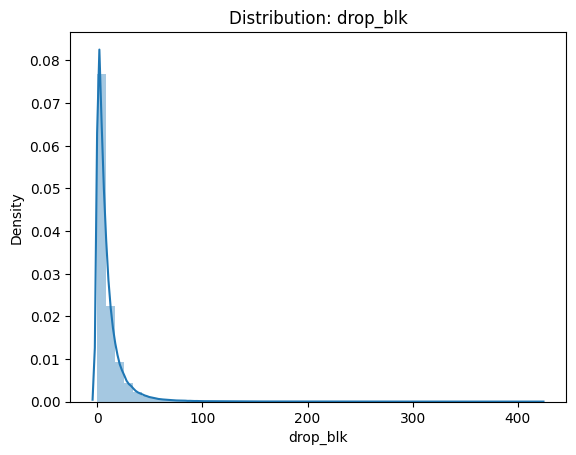

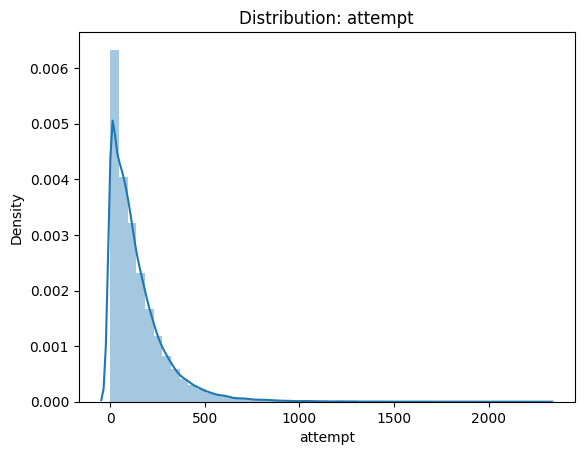

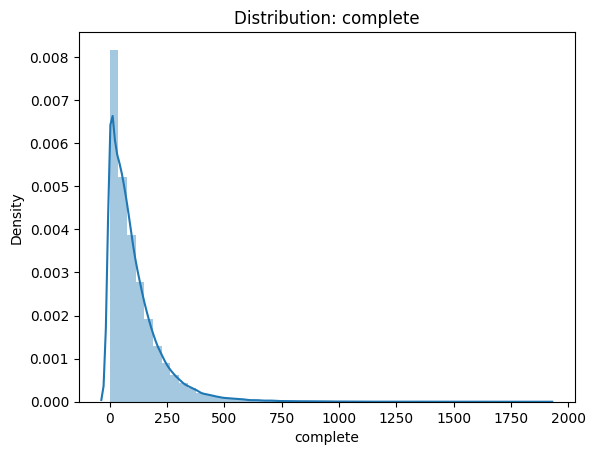

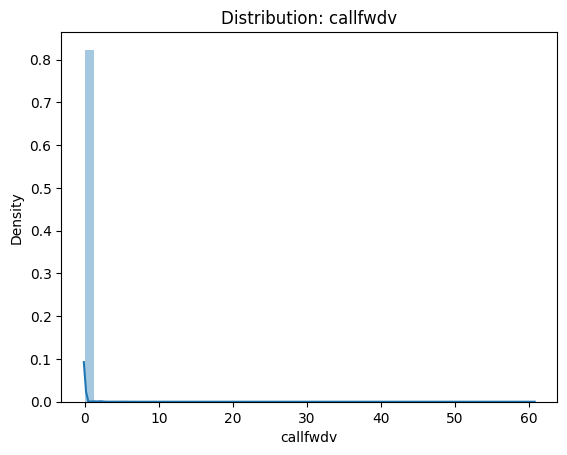

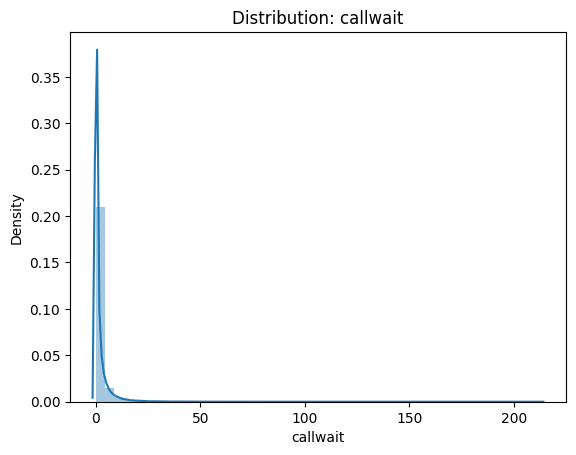

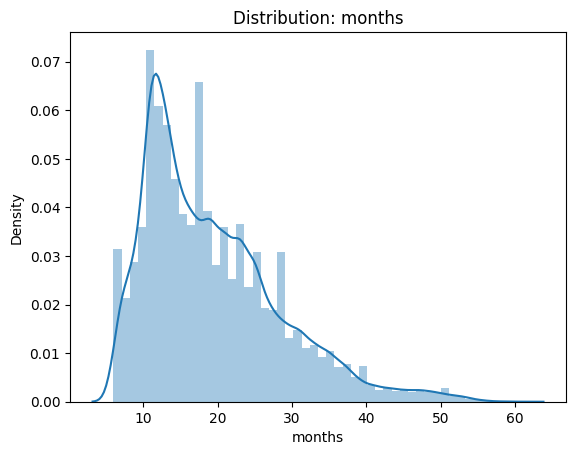

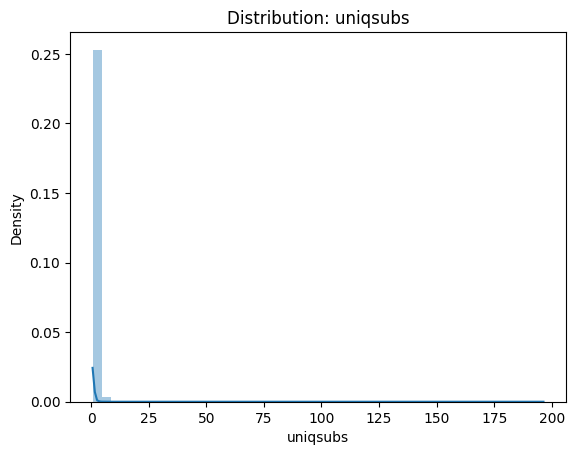

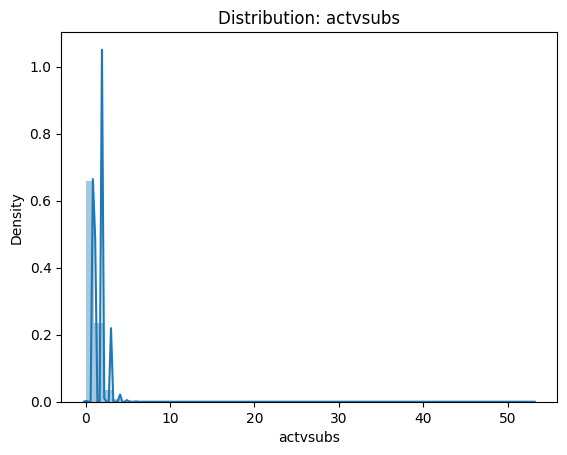

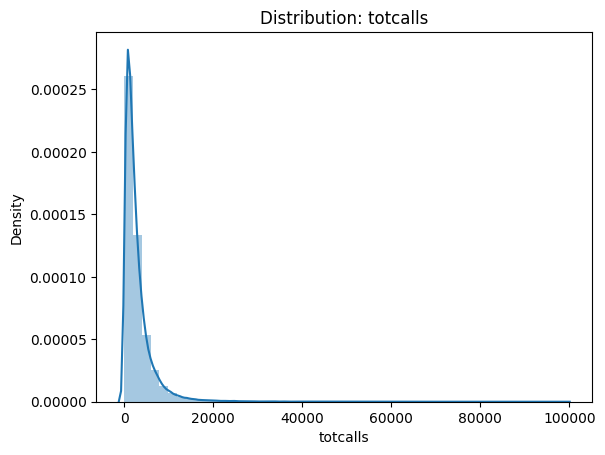

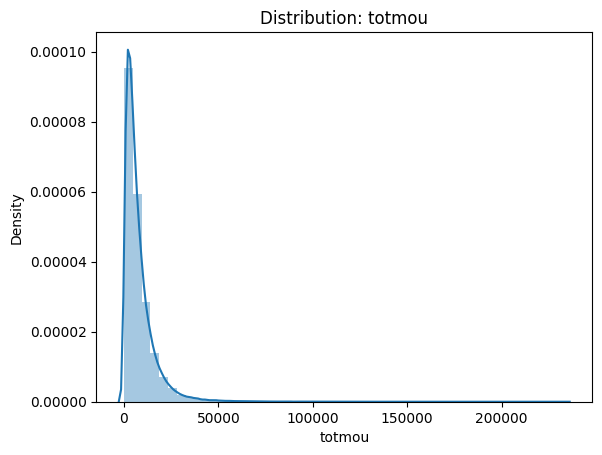

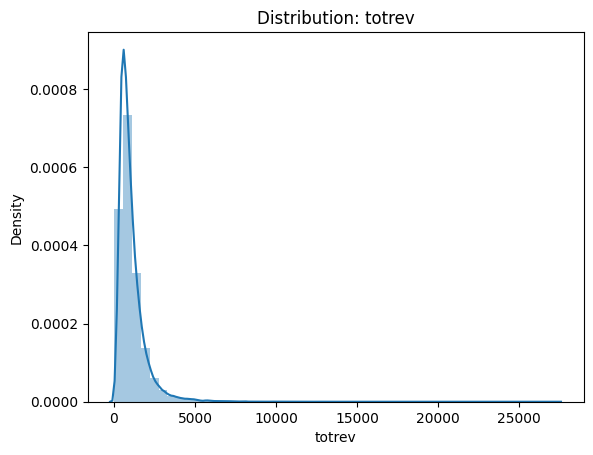

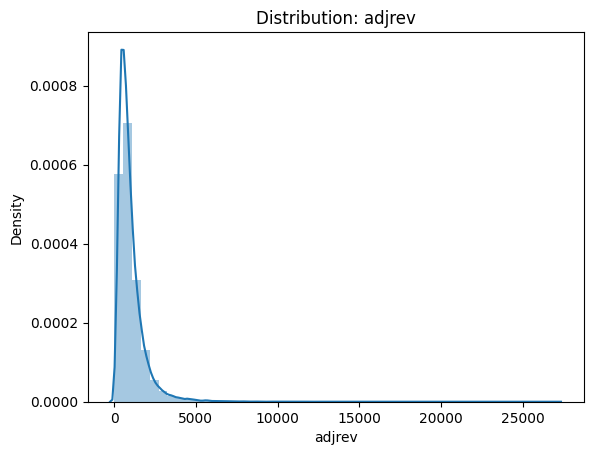

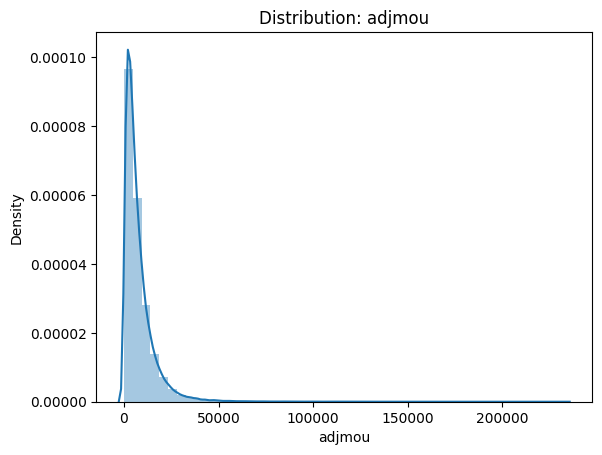

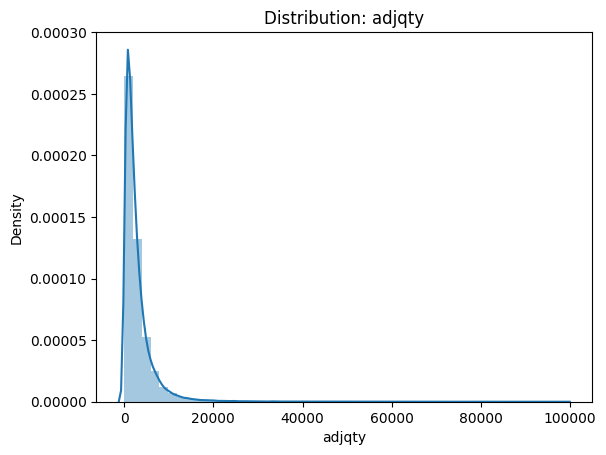

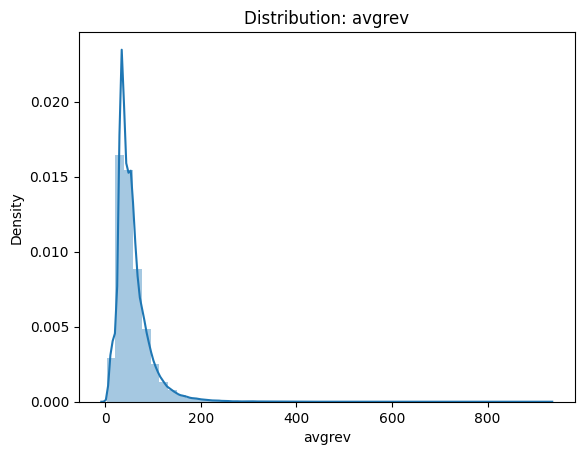

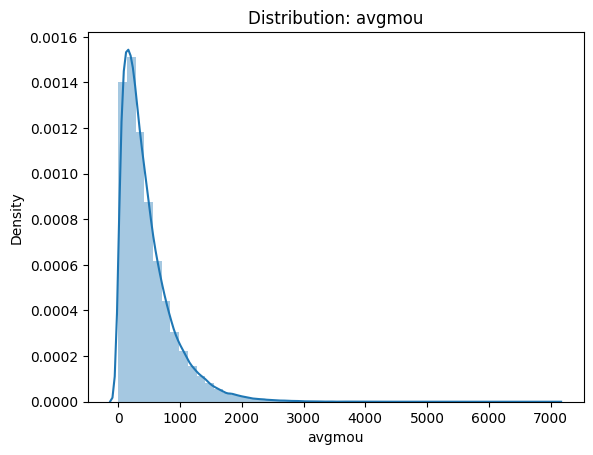

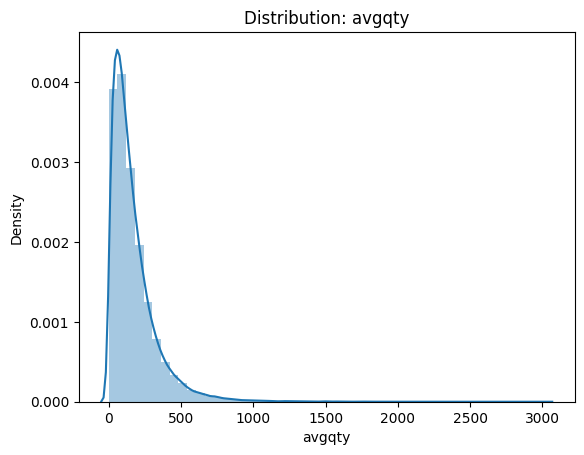

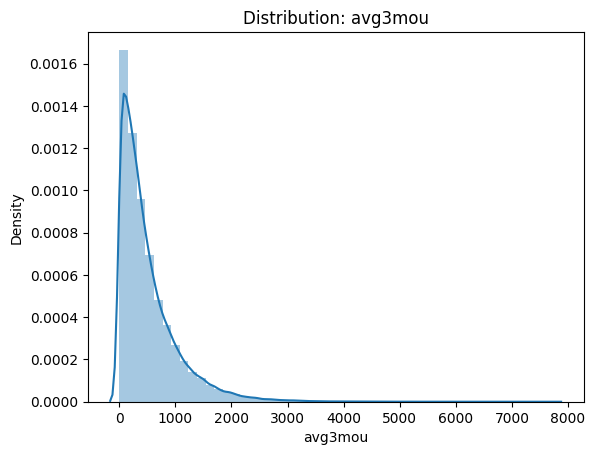

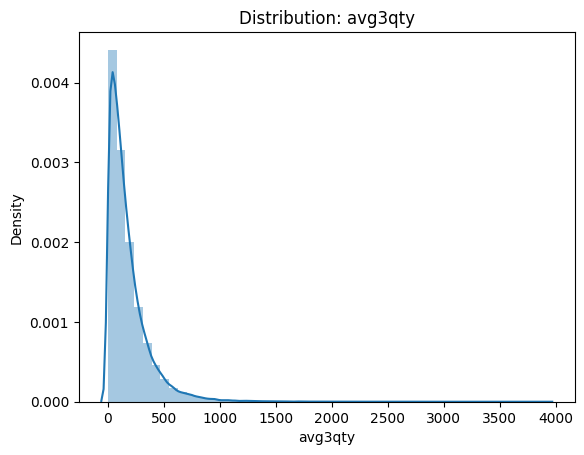

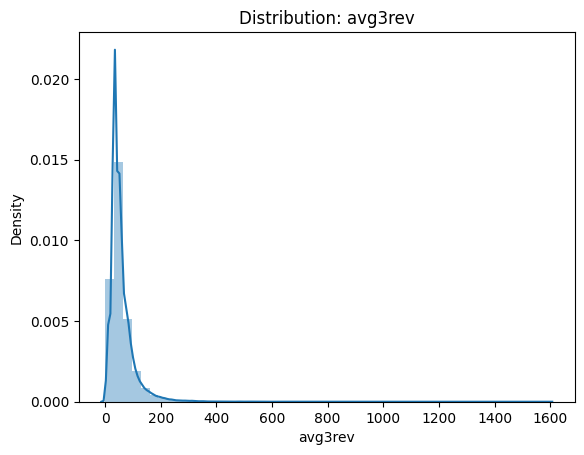

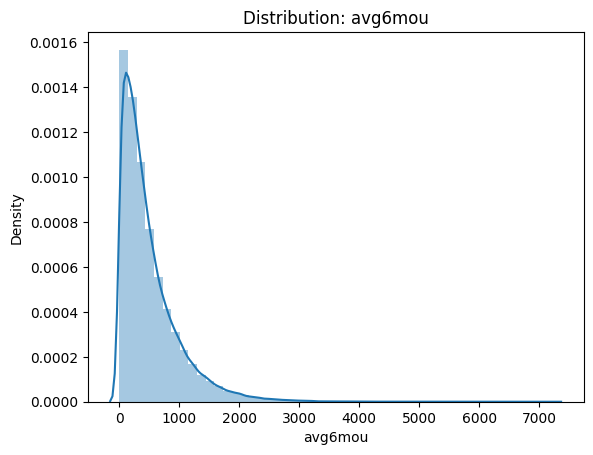

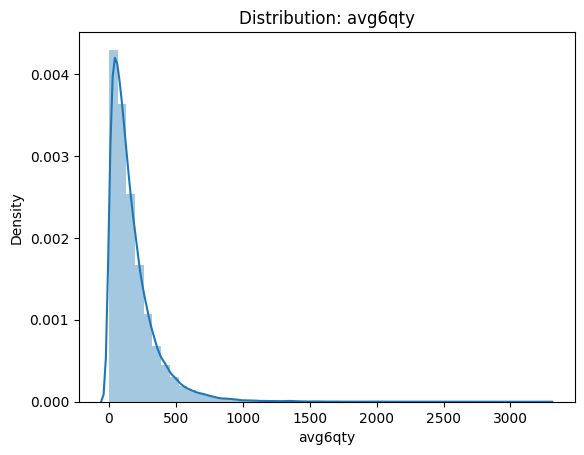

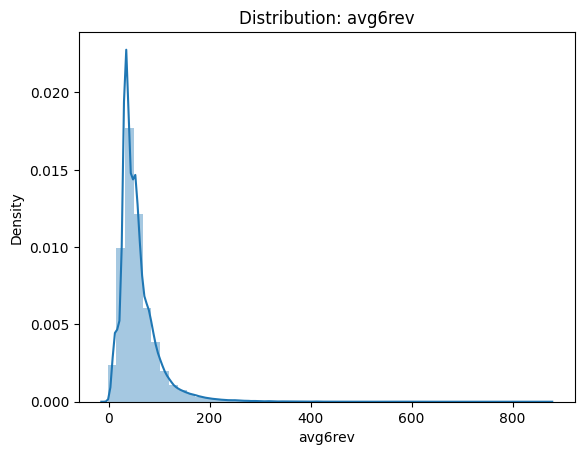

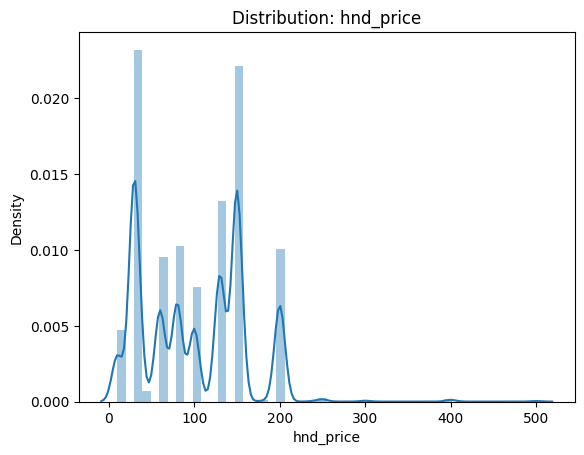

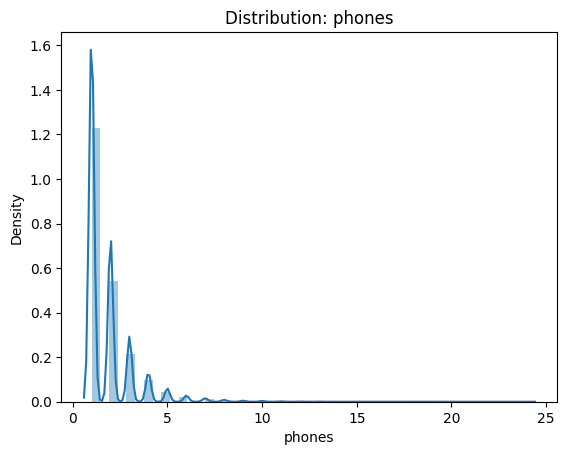

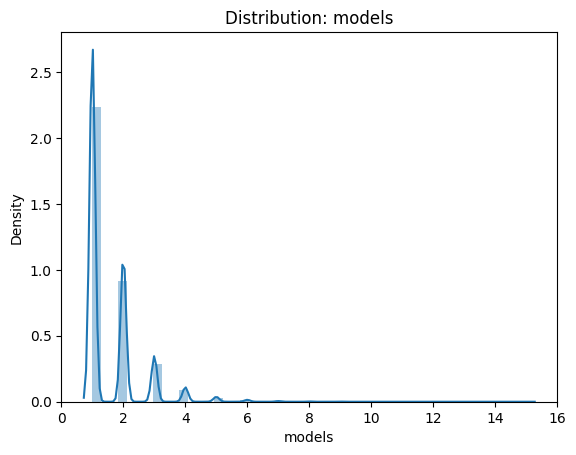

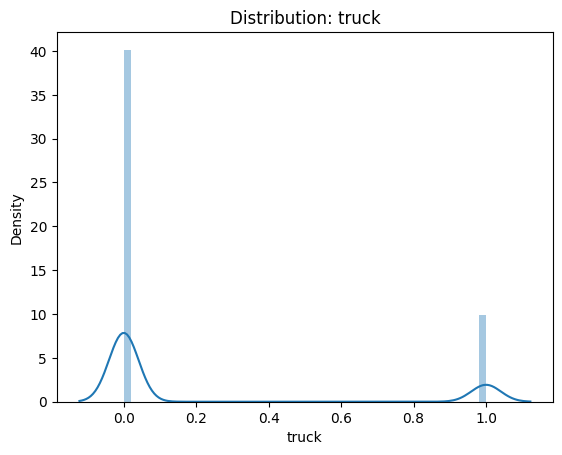

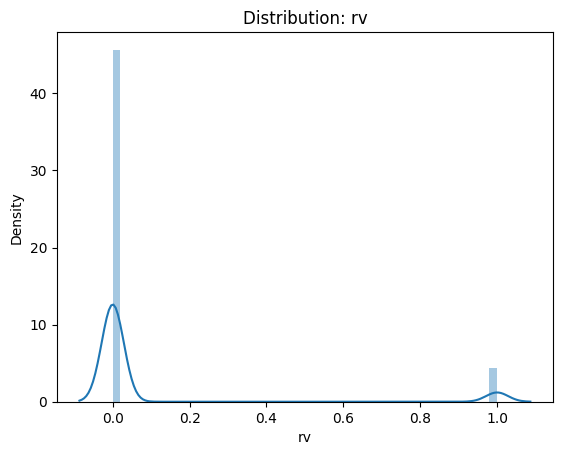

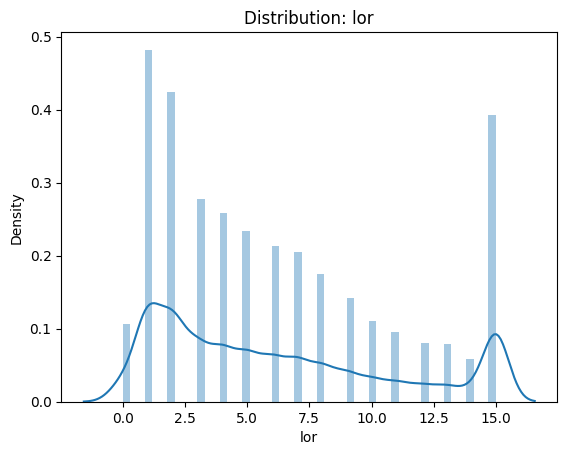

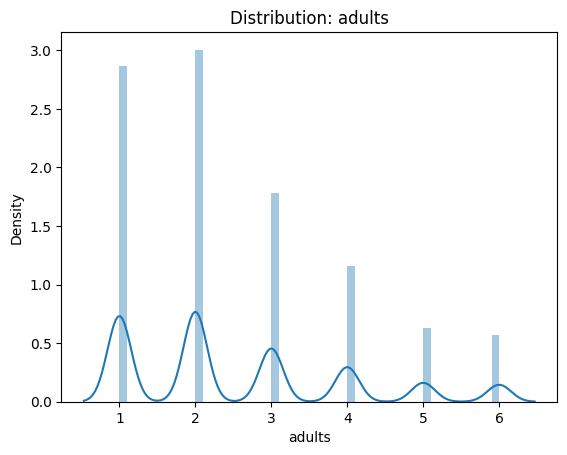

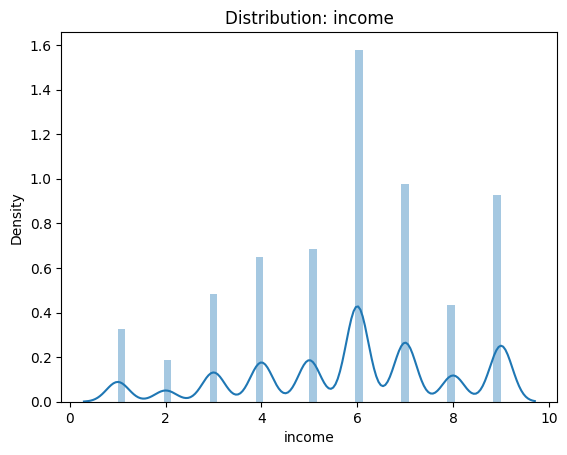

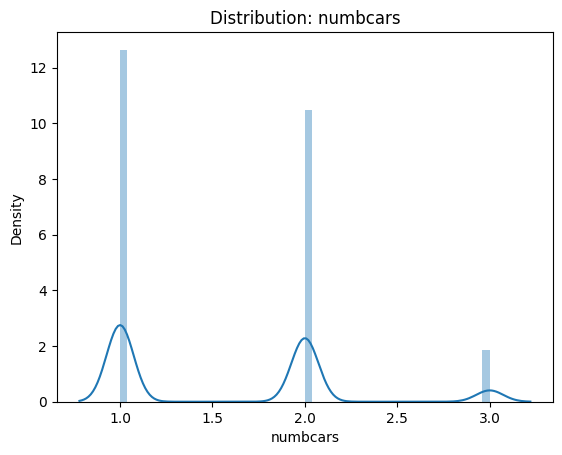

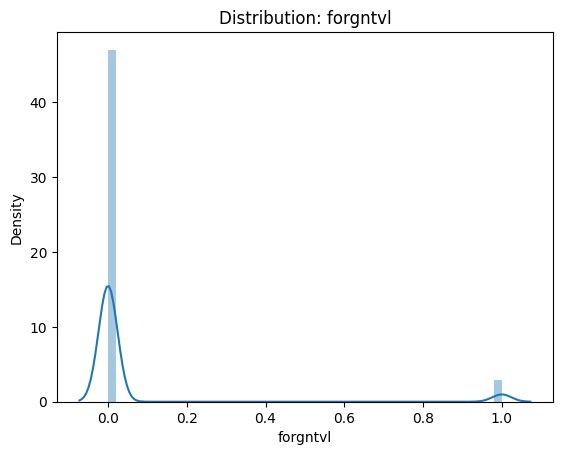

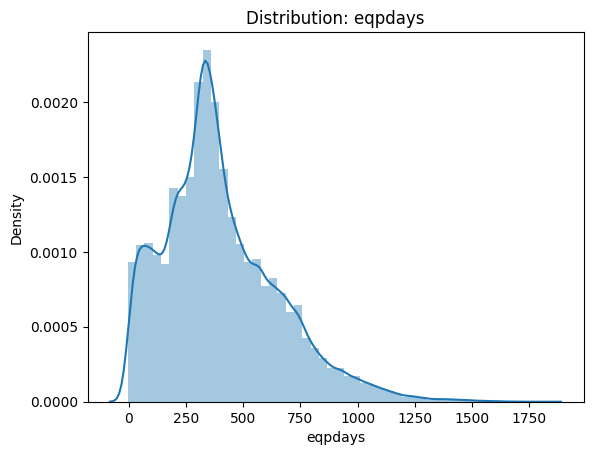

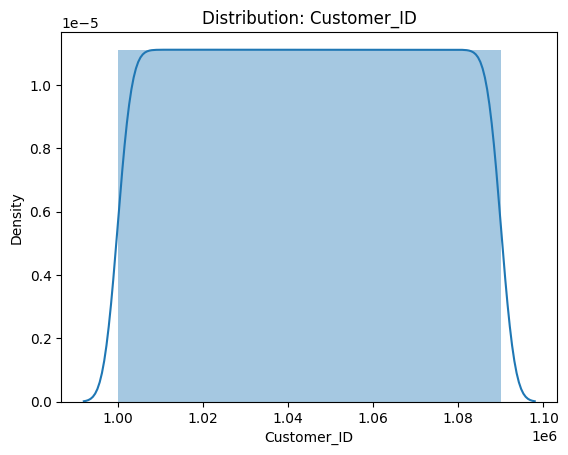

In [ ]:
for i in lista_numericas:
  sns.distplot(df[i], bins=50)
  plt.title('Distribution: ' + i)
  plt.show()

In [ ]:
df.describe().T

count          mean           std           min           25%  \
rev          89866.0  5.831289e+01     46.084103 -5.862500e+00  3.302750e+01   
mou          89866.0  5.042779e+02    516.170057  0.000000e+00  1.485000e+02   
totmrc       89866.0  4.588067e+01     23.370435 -2.691500e+01  3.000000e+01   
da           89866.0  8.778126e-01      2.173665  0.000000e+00  0.000000e+00   
ovrmou       89866.0  4.079898e+01     96.970619  0.000000e+00  0.000000e+00   
...              ...           ...           ...           ...           ...   
income       67804.0  5.809274e+00      2.176928  1.000000e+00  4.000000e+00   
numbcars     46432.0  1.568896e+00      0.628308  1.000000e+00  1.000000e+00   
forgntvl     88549.0  5.925533e-02      0.236103  0.000000e+00  0.000000e+00   
eqpdays      89999.0  4.024194e+02    252.821660 -5.000000e+00  2.270000e+02   
Customer_ID  90000.0  1.045000e+06  25980.906451  1.000001e+06  1.022501e+06   

                      50%           75%           max  
rev          4.766750e+01  7.019375e+01  3.843262e+03  
mou          3.490000e+02  6.890000e+02  1.220675e+04  
totmrc       4.499000e+01  5.999000e+01  4.099900e+02  
da           2.475000e-01  7.425000e-01  1.593900e+02  
ovrmou       2.500000e+00  4.125000e+01  4.320750e+03  
...                   ...           ...           ...  
income       6.000000e+00  7.000000e+00  9.000000e+00  
numbcars     1.000000e+00  2.000000e+00  3.000000e+00  
forgntvl     0.000000e+00  0.000000e+00  1.000000e+00  
eqpdays      3.590000e+02  5.470000e+02  1.812000e+03  
Customer_ID  1.045000e+06  1.067500e+06  1.090000e+06  

[79 rows x 8 columns]

# SPLITTING THE DF

In [ ]:
X = df[features]
y = df[target]

In [ ]:
churn_counts = df['churn'].value_counts()

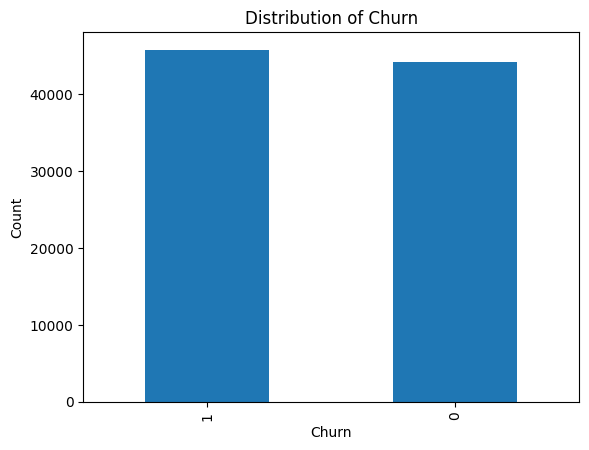

In [ ]:
churn_counts.plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Distribution of Churn')
plt.show()

# Analisis Variable_Target

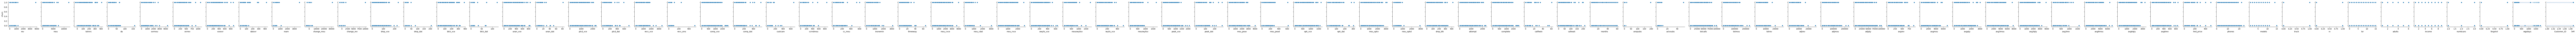

In [ ]:

sns.pairplot(df,x_vars=features, y_vars=target)
plt.show()

# Data Cleaning

In [ ]:
df['churn'].isna().sum()

0

In [ ]:
duplicates = df.duplicated(subset='Customer_ID')

In [ ]:

if duplicates.any():
    print("Duplicates found in the 'Customer_ID' column.")
else:
    print("No duplicates found in the 'Customer_ID' column.")

No duplicates found in the 'Customer_ID' column.


In [ ]:
corr= df.corr()

In [ ]:

corr.style.background_gradient(cmap='coolwarm')

# borrando variable autoexplicativas

In [ ]:
del df['ovrmou']
del df['vceovr']
del df['ccrndmou']
del df['cc_mou']
del df['adjmou']
del df['adjqty']
del df['adjrev']
del df['totcalls']
del df['totmou']
del df['avgmou']
del df['avgqty']
del df['avg3mou']
del df['avg3qty']
del df['avg6mou']
del df['avg6qty']

In [ ]:
corr= df.corr()
corr.style.background_gradient(cmap='coolwarm')

# Imputacion de nulos

In [ ]:
df.isnull().sum()

rev             134
mou             134
totmrc          134
da              134
ovrrev          134
               ... 
kid11_15       1451
kid16_17       1451
creditcd       1451
eqpdays           1
Customer_ID       0
Length: 85, dtype: int64

In [ ]:

df['rev'].isna().sum()

134

In [ ]:
median_rev = df['rev'].median()
df['rev'].fillna(median_rev, inplace=True)

In [ ]:
fill_df = df[(df['mou'] == 0) & (df['churn'] == 0)]


In [ ]:
median_totmrc = df['totmrc'].median()
df.loc[(df['totmrc'] == 0) & (df['churn'] == 0), 'totmrc'] = median_totmrc

In [ ]:
unkonwCategorical = ["prizm_social_one", "area", "refurb_new", "ownrent", "dwlltype", "HHstatin", "dwllsize", "ethnic"]

In [ ]:
for i in unkonwCategorical:
    df[i].fillna("Unknown", inplace=True)

In [ ]:

df["hnd_webcap"].fillna("UNKW", inplace=True)

In [ ]:
categoricalColumns = ["dualband", "marital", "kid0_2", "kid3_5", "kid6_10", "kid11_15", "kid16_17", "creditcd"]

In [ ]:
for i in categoricalColumns:
    df[i].fillna("U", inplace=True)


In [ ]:

eqpdaysMean = df["eqpdays"].mean()
df.loc[(df["eqpdays"]<0), "eqpdays"] = eqpdaysMean

In [ ]:

nullnumericalColumns = ["numbcars", "truck", "rv", "forgntvl"]

In [ ]:

for i in nullnumericalColumns:
    df[i].fillna(0, inplace=True)

In [ ]:
numericalOutlayers = [  "infobase", "avg6rev", "lor", "income", "adults", "hnd_price", "change_mou", "change_rev", "rev", "mou", "totmrc", "da",  "ovrrev",  "datovr", "roam", "phones", "models", "eqpdays", ]

In [ ]:

for i in numericalOutlayers:
    df[i].fillna(-99999, inplace=True)

In [ ]:

print(f"Hay {len(df.columns[df.isnull().any()])} columnas con valores nulos")

Hay 0 columnas con valores nulos


# Encoding categóricos

In [ ]:
booling = {
    "O":1,
    "M":1,
    "Y":1,
    "T":1,
    "WCMB":1,
    "R":0,
    "S":0,
    "U":0,
    "N":0,
    "WC":0,
    "UNKW":-99999,
    "Unknown":-99999
}

In [ ]:
boolEncCol = ["ownrent", "dwlltype", "kid0_2", "kid3_5", "kid6_10", "kid11_15", "kid16_17", "creditcd", "asl_flag","hnd_webcap"]

In [ ]:
for i in boolEncCol:
    df[i].replace(booling, inplace = True)

In [ ]:

booling_2 = {
    "Y":1,
    "N":0,
    "T":1,
    "R":1,
    "U":-99999,
    "Unknown":-99999
}

In [ ]:
boolEncCol_2 = ["dualband", "new_cell", "refurb_new"]

In [ ]:

for i in boolEncCol_2:
    df[i].replace(booling_2, inplace = True)

In [ ]:
replace_dict = {'U': -99999,
                 'M': 1,
                 'S': 0,
                 'B': 0,
                 'A': 0}

In [ ]:
df['marital'] = df['marital'].replace(replace_dict)

In [ ]:
for i in boolEncCol:
    print(df[i].value_counts())

 1        58729
-99999    29491
 0         1780
Name: ownrent, dtype: int64
 0        44521
-99999    27978
 1        17501
Name: dwlltype, dtype: int64
0    86389
1     3611
Name: kid0_2, dtype: int64
0    85759
1     4241
Name: kid3_5, dtype: int64
0    82647
1     7353
Name: kid6_10, dtype: int64
0    81948
1     8052
Name: kid11_15, dtype: int64
0    80870
1     9130
Name: kid16_17, dtype: int64
1    61716
0    28284
Name: creditcd, dtype: int64
0    79401
1    10599
Name: asl_flag, dtype: int64
 1        67396
 0        12883
-99999     9721
Name: hnd_webcap, dtype: int64


In [ ]:

for i in boolEncCol_2:
    print(df[i].value_counts())

 1        69390
 0        20418
-99999      192
Name: dualband, dtype: int64
-99999    58812
 1        18114
 0        13074
Name: new_cell, dtype: int64
 0        76624
 1        13375
-99999        1
Name: refurb_new, dtype: int64


In [ ]:
df["crclscod"].value_counts().sort_index()

A     15602
A2      771
A3        3
AA    34152
B      3743
B2       42
BA    11270
C      1418
C2      152
C5       14
CA     7389
CC       19
CY       21
D       244
D2        5
D4      107
D5       16
DA     3201
E       330
E2       19
E4      305
EA     5521
EC       32
EF        4
EM       46
G       236
GA      265
GY        5
H         8
I       231
IF       14
J       169
JF      192
K        93
L         4
M       153
O        24
P1        2
S         1
TP        5
U       429
U1       56
V         1
V1       70
W        84
Y        38
Z       187
Z1       11
Z2        4
Z4       94
Z5        8
ZA     3177
ZF        1
ZY       12
Name: crclscod, dtype: int64

In [ ]:

counts = df['crclscod'].value_counts()
print('Se genera "counts", donde está el conteo de la variable crclscod')

Se genera "counts", donde está el conteo de la variable crclscod


In [ ]:
crclscod_others = counts[counts<1000].index
print('Se genera un objeto que contiene todas las filas en donde counts es menor a 1000')

Se genera un objeto que contiene todas las filas en donde counts es menor a 1000


In [ ]:
df['crclscod'] = df['crclscod'].replace(crclscod_others, 'Others')
print('Se agrupan todas las categorías de crclscod donde la frecuencia sea menor a 1000 casos, en la categoría "Others"')

Se agrupan todas las categorías de crclscod donde la frecuencia sea menor a 1000 casos, en la categoría "Others"


In [ ]:
df['crclscod'].value_counts()

AA        34152
A         15602
BA        11270
CA         7389
EA         5521
Others     4527
B          3743
DA         3201
ZA         3177
C          1418
Name: crclscod, dtype: int64

In [ ]:
df["dwllsize"].value_counts().sort_index()

A          43118
B           4743
C           1357
D            678
E            490
F            373
G            319
H            265
I            241
J           1280
K            595
L            449
M            344
N            905
O           1079
Unknown    33764
Name: dwllsize, dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Crear una lista de categorías únicas para el codificador
categorias_dwllsize = df["dwllsize"].value_counts().sort_index().index.tolist()

# Inicializar el codificador con las categorías definidas
ordinal_encoder_2 = OrdinalEncoder(categories=[categorias_dwllsize])

# Ajustar y transformar los datos
df['dwllsize'] = ordinal_encoder_2.fit_transform(df[['dwllsize']])

# Actualizar los valores en 'dwllsize' que son iguales a 15 por -99999
df.loc[df['dwllsize'] == 15, 'dwllsize'] = -99999


In [ ]:
df['ethnic'].value_counts()

N          30400
H          11971
S          11624
U           9977
G           5456
Z           3980
O           3811
I           3509
J           2622
F           1940
Unknown     1451
B           1279
R            947
D            800
M            137
P             92
X              4
Name: ethnic, dtype: int64

In [ ]:
counts = df['ethnic'].value_counts()
print('Se genera "counts", donde está el conteo de "ethnic"')

Se genera "counts", donde está el conteo de "ethnic"


In [ ]:

ethnic_RDMPX = counts[counts<1000].index
print('Se genera un objeto que contiene todas las filas en donde "counts" es menor a 1000')

Se genera un objeto que contiene todas las filas en donde "counts" es menor a 1000


In [ ]:
df['ethnic'] = df['ethnic'].replace(ethnic_RDMPX, 'R-i-i-P-X')
print('Se agrupan todas las categorías de "ethnic" donde la frecuencia sea menor a 1000 casos, en la categoría "R-i-i-P-X"')

Se agrupan todas las categorías de "ethnic" donde la frecuencia sea menor a 1000 casos, en la categoría "R-i-i-P-X"


In [ ]:
df['ethnic'].value_counts()

N            30400
H            11971
S            11624
U             9977
G             5456
Z             3980
O             3811
I             3509
J             2622
R-i-i-P-X     1980
F             1940
Unknown       1451
B             1279
Name: ethnic, dtype: int64

In [ ]:
df["area"].value_counts()

NEW YORK CITY AREA               10293
DC/MARYLAND/VIRGINIA AREA         5924
MIDWEST AREA                      5891
ATLANTIC SOUTH AREA               5526
CALIFORNIA NORTH AREA             5476
DALLAS AREA                       5106
NEW ENGLAND AREA                  5090
SOUTHWEST AREA                    5006
CHICAGO AREA                      4762
LOS ANGELES AREA                  4556
GREAT LAKES AREA                  4276
OHIO AREA                         4260
NORTHWEST/ROCKY MOUNTAIN AREA     4013
NORTH FLORIDA AREA                3996
CENTRAL/SOUTH TEXAS AREA          3962
HOUSTON AREA                      3887
SOUTH FLORIDA AREA                3119
TENNESSEE AREA                    2554
PHILADELPHIA AREA                 2263
Unknown                             40
Name: area, dtype: int64

In [ ]:
df["area"] = df["area"].str.split(' AREA').str[0]
print('Se simplifican las categorías de "area" eliminando " AREA" del final')

Se simplifican las categorías de "area" eliminando " AREA" del final


In [ ]:

df['area'] = df['area'].replace(['NORTH FLORIDA', 'SOUTH FLORIDA'], 'NORTH/SOUTH FLORIDA')
print('Se agrupan North y South Florida en una categoría')

Se agrupan North y South Florida en una categoría


In [ ]:
df['area'].value_counts()

NEW YORK CITY               10293
NORTH/SOUTH FLORIDA          7115
DC/MARYLAND/VIRGINIA         5924
MIDWEST                      5891
ATLANTIC SOUTH               5526
CALIFORNIA NORTH             5476
DALLAS                       5106
NEW ENGLAND                  5090
SOUTHWEST                    5006
CHICAGO                      4762
LOS ANGELES                  4556
GREAT LAKES                  4276
OHIO                         4260
NORTHWEST/ROCKY MOUNTAIN     4013
CENTRAL/SOUTH TEXAS          3962
HOUSTON                      3887
TENNESSEE                    2554
PHILADELPHIA                 2263
Unknown                        40
Name: area, dtype: int64

In [ ]:

cols_name = ["area", "ethnic", "crclscod"]
cols_category = df[cols_name]

In [ ]:

for i in cols_category:
    print(df[i].value_counts())

NEW YORK CITY               10293
NORTH/SOUTH FLORIDA          7115
DC/MARYLAND/VIRGINIA         5924
MIDWEST                      5891
ATLANTIC SOUTH               5526
CALIFORNIA NORTH             5476
DALLAS                       5106
NEW ENGLAND                  5090
SOUTHWEST                    5006
CHICAGO                      4762
LOS ANGELES                  4556
GREAT LAKES                  4276
OHIO                         4260
NORTHWEST/ROCKY MOUNTAIN     4013
CENTRAL/SOUTH TEXAS          3962
HOUSTON                      3887
TENNESSEE                    2554
PHILADELPHIA                 2263
Unknown                        40
Name: area, dtype: int64
N            30400
H            11971
S            11624
U             9977
G             5456
Z             3980
O             3811
I             3509
J             2622
R-i-i-P-X     1980
F             1940
Unknown       1451
B             1279
Name: ethnic, dtype: int64
AA        34152
A         15602
BA        11270
CA     

In [ ]:

for col in cols_category:
    df = pd.get_dummies(df, columns=[col])
print('Se genera un One-Hot-Encoding en las columnas: "crclscod", "area", ethnic: \n', 'Se incluye "crclscod", a pesar de que me parece que tiene un sentido ordinal, debido a que no se conocen todas las posibles combinaciones de letras y su orden)')

Se genera un One-Hot-Encoding en las columnas: "crclscod", "area", ethnic: 
 Se incluye "crclscod", a pesar de que me parece que tiene un sentido ordinal, debido a que no se conocen todas las posibles combinaciones de letras y su orden)


In [ ]:
df = df.drop('infobase', axis=1)

 ENCODING ORDINAL

In [ ]:
df['prizm_social_one'].value_counts()

S          29203
U          20935
C          15244
T          13705
Unknown     6537
R           4376
Name: prizm_social_one, dtype: int64

In [ ]:
replace_alphabet = {
    'A' : 1,
    'B' : 2,
    'C' : 3,
    'D' : 4,
    'E' : 5,
    'F' : 6,
    'G' : 7,
    'H' : 8,
    'I' : 9,
    'J' : 10,
    'K' : 11,
    'L' : 12,
    'M' : 13,
    'N' : 14,
    'O' : 15,
    'P' : 16,
    'Q' : 17,
    'R' : 18,
    'S' : 19,
    'T' : 20,
    'U' : 21,
    'V' : 22,
    'W' : 23,
    'X' : 24,
    'Y' : 25,
    'Z' : 26,
    "Unknown": -99999
}
print('Se genera un diccionario de orden alfabetico para reemplazar "prizm_social_one", considerando que el social group es un indicador ordinal')

Se genera un diccionario de orden alfabetico para reemplazar "prizm_social_one", considerando que el social group es un indicador ordinal


In [ ]:
df['prizm_social_one'] = df['prizm_social_one'].replace(replace_alphabet)
print('Se reemplaza las categorías de "prizm_social_one" según el orden de sus letras, para así mantener su orientación ordinal')

Se reemplaza las categorías de "prizm_social_one" según el orden de sus letras, para así mantener su orientación ordinal


In [ ]:
df['prizm_social_one'].value_counts()

 19       29203
 21       20935
 3        15244
 20       13705
-99999     6537
 18        4376
Name: prizm_social_one, dtype: int64

In [ ]:
df['HHstatin'].value_counts()

C          36093
Unknown    33032
I          11385
A           4194
B           2908
G           1558
H            830
Name: HHstatin, dtype: int64

In [ ]:
df['HHstatin'] = df['HHstatin'].replace(replace_alphabet)
print('Se utiliza el diccionario de orden alfabetico para reemplazar "HHstatin", considerando que el premier household status es un indicador ordinal')

Se utiliza el diccionario de orden alfabetico para reemplazar "HHstatin", considerando que el premier household status es un indicador ordinal


In [ ]:
df['HHstatin'].value_counts()

 3        36093
-99999    33032
 9        11385
 1         4194
 2         2908
 7         1558
 8          830
Name: HHstatin, dtype: int64

In [ ]:

orr = df.corr()

In [ ]:
corr.style.background_gradient(cmap='coolwarm')

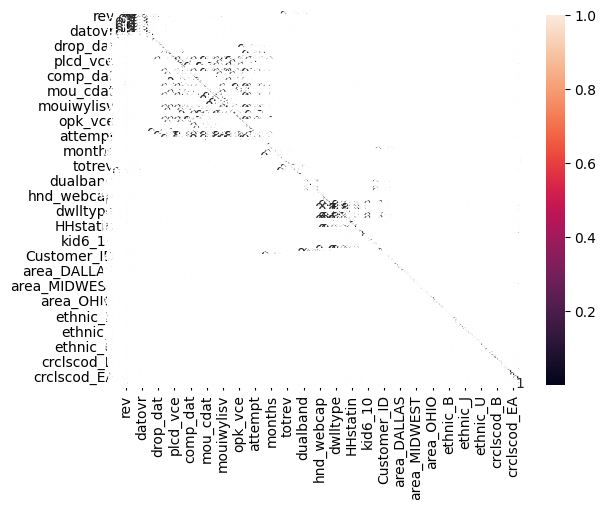

In [ ]:

sns.heatmap(df.corr().abs(),annot=True)
plt.show()

In [ ]:
target = "churn"
features = df.columns[df.columns!=target]

In [ ]:
X = df[features]
y = df[target]

# Eliminar baja varianza

In [ ]:

def highly_correlated(X, y, threshold):
    col_corr = list()
    colnames = list()
    rownames = list()
    corr_matrix = X.corr().abs()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i])
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Z = pd.DataFrame({'F1':colnames,
                      'F2':rownames,
                      'corr_F1_F2':col_corr,
                      'corr_F1_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in colnames],
                      'corr_F2_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in rownames]
                      })
    Z['F_to_delete'] = rownames
    Z['F_to_delete'][Z['corr_F1_target'] < Z['corr_F2_target']] = Z['F1'][Z['corr_F1_target'] < Z['corr_F2_target']]

    return Z

In [ ]:

highly_corr = highly_correlated(X,y,0.95)
highly_corr

F1          F2  corr_F1_F2  corr_F1_target  corr_F2_target  \
0       totmrc         mou    0.991701        0.034307        0.041246   
1           da         mou    0.991287        0.033909        0.041246   
2           da      totmrc    0.999983        0.033909        0.034307   
3       ovrrev         mou    0.991785        0.033732        0.041246   
4       ovrrev      totmrc    0.999959        0.033732        0.034307   
5       ovrrev          da    0.999971        0.033732        0.033909   
6       datovr         mou    0.991267        0.033898        0.041246   
7       datovr      totmrc    0.999982        0.033898        0.034307   
8       datovr          da    1.000000        0.033898        0.033909   
9       datovr      ovrrev    0.999970        0.033898        0.033732   
10        roam         mou    0.991319        0.033864        0.041246   
11        roam      totmrc    0.999975        0.033864        0.034307   
12        roam          da    0.999992        0.033864        0.033909   
13        roam      ovrrev    0.999963        0.033864        0.033732   
14        roam      datovr    0.999992        0.033864        0.033898   
15  change_rev  change_mou    0.999565        0.058694        0.059793   
16    comp_vce    plcd_vce    0.985686        0.050651        0.047029   
17    comp_dat    plcd_dat    0.990591        0.007206        0.007389   
18    inonemin    recv_vce    0.965997        0.033247        0.040898   
19    mou_opkd    mou_cdat    0.960178        0.008218        0.008764   
20     attempt    plcd_vce    0.998551        0.047133        0.047029   
21     attempt    comp_vce    0.984313        0.047133        0.050651   
22    complete    plcd_vce    0.983671        0.050721        0.047029   
23    complete    comp_vce    0.997889        0.050721        0.050651   
24    complete     attempt    0.985763        0.050721        0.047133   
25      phones  refurb_new    0.999993        0.003203        0.003425   
26      models  refurb_new    0.999997        0.003245        0.003425   
27      models      phones    0.999998        0.003245        0.003203   

   F_to_delete  
0       totmrc  
1           da  
2           da  
3       ovrrev  
4       ovrrev  
5       ovrrev  
6       datovr  
7       datovr  
8       datovr  
9       ovrrev  
10        roam  
11        roam  
12        roam  
13      ovrrev  
14        roam  
15  change_rev  
16    plcd_vce  
17    comp_dat  
18    inonemin  
19    mou_opkd  
20    plcd_vce  
21     attempt  
22    plcd_vce  
23    comp_vce  
24     attempt  
25      phones  
26      models  
27      phones

In [ ]:
highly_corr["F_to_delete"].value_counts()

ovrrev        5
roam          4
datovr        3
plcd_vce      3
da            2
attempt       2
phones        2
totmrc        1
change_rev    1
comp_dat      1
inonemin      1
mou_opkd      1
comp_vce      1
models        1
Name: F_to_delete, dtype: int64

In [ ]:

highly_corr_delete = highly_corr["F_to_delete"].value_counts().index.to_list()
highly_corr_delete

['ovrrev',
 'roam',
 'datovr',
 'plcd_vce',
 'da',
 'attempt',
 'phones',
 'totmrc',
 'change_rev',
 'comp_dat',
 'inonemin',
 'mou_opkd',
 'comp_vce',
 'models']

In [ ]:
X.drop(columns=highly_corr_delete, inplace=True)
print(('Eliminadas columnas altamente correlacionadas:', highly_corr_delete))

('Eliminadas columnas altamente correlacionadas:', ['ovrrev', 'roam', 'datovr', 'plcd_vce', 'da', 'attempt', 'phones', 'totmrc', 'change_rev', 'comp_dat', 'inonemin', 'mou_opkd', 'comp_vce', 'models'])


In [ ]:
df.head()

rev     mou  totmrc      da  ovrrev  datovr  roam  change_mou  \
0  23.9975  219.25  22.500  0.2475     0.0     0.0   0.0     -157.25   
1  57.4925  482.75  37.425  0.2475     9.1     0.0   0.0      532.25   
2  16.9900   10.25  16.990  0.0000     0.0     0.0   0.0       -4.25   
3  38.0000    7.50  38.000  0.0000     0.0     0.0   0.0       -1.50   
4  55.2300  570.50  71.980  0.0000     0.0     0.0   0.0       38.50   

   change_rev  drop_vce  drop_dat  blck_vce  blck_dat   unan_vce  unan_dat  \
0    -18.9975  0.666667       0.0  0.666667       0.0   6.333333       0.0   
1     50.9875  8.333333       0.0  1.000000       0.0  61.333333       0.0   
2      0.0000  0.333333       0.0  0.000000       0.0   2.666667       0.0   
3      0.0000  0.000000       0.0  0.000000       0.0   0.000000       0.0   
4      0.0000  9.666667       0.0  0.666667       0.0  77.000000       0.0   

     plcd_vce  plcd_dat   recv_vce  recv_sms    comp_vce  comp_dat  custcare  \
0   52.333333       0.0  42.333333       0.0   45.000000       0.0  0.000000   
1  263.333333       0.0  69.000000       0.0  193.333333       0.0  1.666667   
2    9.000000       0.0   0.333333       0.0    6.000000       0.0  0.000000   
3    3.666667       0.0   1.333333       0.0    3.666667       0.0  0.000000   
4  222.333333       0.0  94.666667       0.0  137.000000       0.0  8.666667   

    inonemin  threeway    mou_cvce  mou_cdat    mou_rvce  owylis_vce  \
0  18.000000  0.000000   90.643333       0.0   97.176667    0.000000   
1  53.000000  0.333333  189.396667       0.0   55.280000   46.333333   
2   0.333333  0.000000    5.426667       0.0    0.000000    0.000000   
3   1.333333  0.000000    8.410000       0.0    0.413333    0.333333   
4  66.000000  0.000000  285.233333       0.0  106.330000   14.666667   

   mouowylisv  iwylis_vce  mouiwylisv   peak_vce  peak_dat    mou_peav  \
0    0.000000    0.000000    0.000000  58.000000       0.0  132.600000   
1   24.216667    6.333333    3.696667  83.666667       0.0   75.333333   
2    0.000000    0.000000    0.000000   5.000000       0.0    5.193333   
3    0.256667    0.000000    0.000000   1.333333       0.0    3.380000   
4   10.816667    0.666667    0.366667  97.333333       0.0  173.476667   

   mou_pead     opk_vce  opk_dat    mou_opkv  mou_opkd   drop_blk     attempt  \
0       0.0   24.000000      0.0   55.220000       0.0   1.333333   52.333333   
1       0.0  157.000000      0.0  169.343333       0.0   9.333333  263.333333   
2       0.0    1.000000      0.0    0.233333       0.0   0.333333    9.000000   
3       0.0    3.666667      0.0    5.450000       0.0   0.000000    3.666667   
4       0.0   90.333333      0.0  218.086667       0.0  10.333333  222.333333   

     complete  callfwdv  callwait  churn  months  uniqsubs  actvsubs  \
0   45.000000       0.0  0.333333      1      61         2         1   
1  193.333333       0.0  5.666667      0      56         1         1   
2    6.000000       0.0  0.000000      1      58         1         1   
3    3.666667       0.0  0.000000      0      60         1         1   
4  137.000000       0.0  0.000000      0      57         1         1   

   new_cell  asl_flag   totrev  avgrev  avg3rev  avg6rev  prizm_social_one  \
0    -99999         0  1504.62   29.66       30     38.0                19   
1         0         0  2851.68   51.53       40     48.0                21   
2         1         0  2155.91   34.54       17     17.0                19   
3         1         0  2000.90   40.45       38     40.0                20   
4         1         0  2181.12   38.69       55     80.0                21   

   dualband  refurb_new    hnd_price  phones  models  hnd_webcap  truck   rv  \
0         1           0    149.98999     2.0     2.0           1    0.0  0.0   
1         0           0 -99999.00000     7.0     6.0           0    1.0  1.0   
2         0           0     29.98999     2.0     1.0      -99999    0.0  0.0   
3         0           0     29.98999 

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
vt = VarianceThreshold(threshold = 0.01)
vt.fit(X)

VarianceThreshold(threshold=0.01)

In [ ]:
cols_lowvar = X.columns[vt.get_support()==False]
X.drop(columns=cols_lowvar,inplace=True)

In [ ]:

print(len(cols_lowvar),' low variance features were removed:\n', cols_lowvar.to_list())

1  low variance features were removed:
 ['area_Unknown']


In [ ]:
df = pd.concat([X, y], axis=1)

# Guardar Clean data

In [ ]:
df.shape

(90000, 108)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Columns: 108 entries, rev to churn
dtypes: float64(45), int64(22), uint8(41)
memory usage: 49.5 MB


In [ ]:
clean_df_prepro = df.copy()

In [ ]:
pd.to_pickle(clean_df_prepro,"/content/drive/MyDrive/EJERCICIO-ML-Sup-main/data/clean_df_prepro_pk")

In [ ]:
df1 = pd.read_pickle("/content/drive/MyDrive/EJERCICIO-ML-Sup-main/data/clean_df_prepro_pk")

In [ ]:
df1

rev     mou  change_mou   drop_vce  drop_dat  blck_vce  blck_dat  \
0       23.9975  219.25     -157.25   0.666667       0.0  0.666667       0.0   
1       57.4925  482.75      532.25   8.333333       0.0  1.000000       0.0   
2       16.9900   10.25       -4.25   0.333333       0.0  0.000000       0.0   
3       38.0000    7.50       -1.50   0.000000       0.0  0.000000       0.0   
4       55.2300  570.50       38.50   9.666667       0.0  0.666667       0.0   
...         ...     ...         ...        ...       ...       ...       ...   
89995  125.2700  936.25      109.75  11.666667       0.0  1.666667       0.0   
89996   72.7450  455.00     -241.00   2.666667       0.0  3.000000       0.0   
89997   59.7300  830.50      159.50  12.666667       0.0  2.666667       0.0   
89998   53.1350  152.00       62.00   3.000000       0.0  0.333333       0.0   
89999   14.2000  164.25      -18.25   0.666667       0.0  5.666667       0.0   

        unan_vce  unan_dat  plcd_dat    recv_vce  recv_sms  custcare  \
0       6.333333  0.000000  0.000000   42.333333       0.0  0.000000   
1      61.333333  0.000000  0.000000   69.000000       0.0  1.666667   
2       2.666667  0.000000  0.000000    0.333333       0.0  0.000000   
3       0.000000  0.000000  0.000000    1.333333       0.0  0.000000   
4      77.000000  0.000000  0.000000   94.666667       0.0  8.666667   
...          ...       ...       ...         ...       ...       ...   
89995  26.666667  0.000000  0.000000  102.666667       0.0  0.333333   
89996  42.333333  0.333333  0.333333   63.666667       0.0  0.000000   
89997  54.000000  0.000000  0.000000   75.000000       0.0  0.333333   
89998   4.333333  0.000000  0.000000    7.666667       0.0  1.333333   
89999  13.333333  0.000000  0.000000   25.666667       0.0  0.666667   

       threeway    mou_cvce  mou_cdat    mou_rvce  owylis_vce  mouowylisv  \
0      0.000000   90.643333       0.0   97.176667    0.000000    0.000000   
1      0.333333  189.396667       0.0   55.280000   46.333333   24.216667   
2      0.000000    5.426667       0.0    0.000000    0.000000    0.000000   
3      0.000000    8.410000       0.0    0.413333    0.333333    0.256667   
4      0.000000  285.233333       0.0  106.330000   14.666667   10.816667   
...         ...         ...       ...         ...         ...         ...   
89995  0.000000  478.783333       0.0  224.973333   93.666667  180.833333   
89996  0.000000  207.913333       0.0  105.433333   65.000000   50.750000   
89997  0.333333  471.706667       0.0  222.053333   55.000000  116.556667   
89998  0.000000   64.673333       0.0   23.043333    6.666667    9.993333   
89999  0.000000   43.120000       0.0   39.876667   12.000000   17.860000   

       iwylis_vce  mouiwylisv    peak_vce  peak_dat    mou_peav  mou_pead  \
0        0.000000    0.000000   58.000000       0.0  132.600000       0.0   
1        6.333333    3.696667   83.666667       0.0   75.333333       0.0   
2        0.000000    0.000000    5.000000       0.0    5.193333       0.0   
3        0.000000    0.000000    1.333333       0.0    3.380000       0.0   
4        0.666667    0.366667   97.333333       0.0  173.476667       0.0   
...           ...         ...         ...       ...         ...       ...   
89995   28.666667  144.496667  168.666667       0.0  474.263333       0.0   
89996   34.000000   67.190000  156.333333       0.0  175.523333       0.0   
89997   18.333333   77.033333  130.666667       0.0  325.596667       0.0   
89998    1.333333    3.380000   16.333333       0.0   66.383333       0.0   
89999   14.000000   25.443333   32.666667       0.0   50.663333       0.0   

          opk_vce  opk_dat    mou_opkv   drop_blk    complete  callfwdv  \
0       24.000000      0.0   55.220000   1.333333   45.000000       0.0   
1      157.000000      0.0  169.343333   9.333333  193.333333       0.0   
2        1.000000      0.0    0.233333   0.333333    6.000000       0.0   
3        3.666667      0.0    5.4500

In [ ]:
df1.shape

(90000, 108)